## Case Study - in vehicle coupon recommendation

### 1. Dataset
 - Amazon Mechanical Turk 설문조사를 통해 수집된 데이터
  - 목적지, 현재시간, 날씨, 동승자 등 다양한 운전 시나리오를 주고 운전자인 경우 쿠폰을 수락할 것인지 여부를 묻는 설문조사

이 실험의 목표는 지역 비즈니스에 대한 쿠폰을 제공하는 차량 내 추천 시스템에서 추천에 대한 고객의 반응을 파악하는 것이었습니다. 쿠폰은 사용자의 특정 상황에 맞게 타겟팅되었습니다. 데이터는 곧 설명할 설문조사를 통해 Amazon Mechanical Turk에서 수집했습니다. 높은 평점(95% 이상)을 받은 터커를 사용했습니다.
752개의 설문조사 중 652개가 수락되어 12684개의 데이터 케이스가 생성되었습니다(누락된 속성이 포함된 행을 제거한 후).
예측 문제는 인구통계학적 및 상황적 속성을 고려하여 고객이 특정 장소에 대한 쿠폰을 수락할지 여부를 예측하는 것입니다. 사용자가 '지금 바로' 또는 '쿠폰이 만료되기 전에 나중에' 방문할 것이라고 대답하면 'Y = 1'로, '아니요, 쿠폰을 원하지 않습니다'라고 대답하면 'Y = 0'으로 레이블이 지정됩니다. 우리는 다섯 가지 유형의 쿠폰을 조사하고자 합니다:
바, 테이크아웃 음식점, 커피 하우스, 저렴한 음식점(1인당 평균 20달러 미만), 비싼 음식점(1인당 평균 20달러에서 50달러 사이). 설문조사의 첫 번째 부분에서는 사용자에게 인구통계학적 정보와 선호도를 제공하도록 요청했습니다. 두 번째 부분에서는 각 사용자에게 20가지 운전 시나리오(부록 B의 예시 참조)와 함께 추가 상황 정보 및 쿠폰 정보(속성에 대한 전체 설명은 부록 B 참조)를 설명하고 쿠폰 사용 여부를 물었습니다.

 - Attribute
   - **'destination'(목적지)** : No Urgent Place, Home, Work
   - **'passanger'(동승자)** : Alone, Friend(s), Kid(s), Partner(who are the passengers in the car)
   - **'weather'(날씨)** : Sunny, Rainy, Snowy
   - **'temperature'(온도)** : 55, 80, 30
   - **'time'(시간)** : 2PM, 10AM, 6PM, 7AM, 10PM
   - **'coupon'(쿠폰)** : Restaurant(\<\$20), Coffee House, Carry out & Take away, Bar, Restaurant(\$20~\$50)
   - **'gender'(성별)** : Female, Male
   - **'age'(나이)** : 21,46, 26, 31, 41, 50plus, 36, below21
   - **'maritalStatus'(결혼 상태)** : Unmarried partner, Single, Married partner, Divorced, Widowed
   - **'has_Children'(자녀 유무)** : 1, 0
   - **'education'(학력)** : Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
   - **'occupation'(직업)** : Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
  - **'income'(소득)** : \$37500 ~ \$49999, \$62500 ~ \$74999, \$12500 ~ \$24999, \$75000 ~ \$87499, \$50000 ~ \$62499, \$25000 ~ \$37499, \$100000 or More, \$87500 ~ \$99999, Less than \$12500
  - **'Bar'(매달 바 방문 횟수)** : never, less1, 1\~3, gt8, nan4~8
  - **'CoffeeHouse'(매달 커피하우스 방문 횟수)** : never, less1, 4\~8, 1~3, gt8, nan
  - **'CarryAway'(매달 테이크아웃 음식을 먹는 횟수)** : n4\~8, 1~3, gt8, less1, never
  - **'RestaurantLessThan20'(매달 1인당 평균 지출이 20달러 미만인 레스토랑 방문 횟수)** : 4\~8, 1~3, less1, gt8, never
  - **'Restaurant20To50'(매달 1인당 평균 지출이 20\~50달러인 레스토랑 방문 횟수)** : 1\~3, less1, never, gt8, 4~8, nan
  - **'toCoupon_GEQ15min'(쿠폰 사용을 위해 레스토랑/바까지 운전 허용 거리가 15분 이상인가)** : 1, 0
  - **'toCoupon_GEQ25min'(쿠폰 사용을 위해 레스토랑/바까지 운전 허용 거리가 25분 이상인가)** : 1, 0
  - **'direction_same'(레스토랑/바가 현재 목적지와 같은 방향인가)** : 1, 0
  - **'direction_opp'(레스토랑/바가 현재 목적지와 같은 방향인가)** : 1, 0
  - **'Y'(쿠폰 수락 여부)** : 1, 0



The attributes of this data set include:
1. User attributes (사용자 속성)

  • Gender, Age, Marital Status, Number of children, Education, Occupation, Annual income, Number of times that he/she goes to a bar, Number of times that he/she buys takeaway food, Number of times that he/she goes to a coffee house, Number of times that he/she eats at a restaurant with average expense less than $20 per person, Number of times that he/she goes to a bar

2. Contextual attributes(문맥적 속성)

  • Driving destination, Location of user, coupon and destination, Weather, Temperature, Time, Passenger

3. Coupon attributes(쿠폰 속성)

  • time before it expires


참고 논문 : https://jmlr.org/papers/volume18/16-003/16-003.pdf
(Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.)

#### 1.1 Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(5, 5))
plt.rc('font', size=13)
plt.style.use('ggplot')

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/2024년 1학기/데이터마이닝/in-vehicle-coupon-recommendation.csv')

In [ ]:
df = dataset.copy()
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 26 columns]

In [ ]:
df.shape

(12684, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### 1.2 Preprocessing

- **Issue**
  1.  car, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 컬럼에 결측치 존재
    1) car(운전하는 기기의 종류) : 운전하는 기기의 종류에 대한 컬럼으로 결측치가 가장 많음, 해당 컬럼을 활용하려면 전체 데이터의 수가 너무 많이 줄어들며 범주형 변수로 대체값을 지정하기 어렵기 때문에 컬럼 자체를 삭제하여 분석 진행

    2) Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 : 해당 컬럼들은 결측치가 전체 데이터 수에 비해 많지 않고(약 5%) 소비자의 행동에 대해 분석하기 위한 본 프로젝트의 목적을 위해 결측치가 있는 행은 제거하고 결측치가 존재하지 않는 데이터에 대해서만 분석 진행

  2. 중복된 행이 74개 존재 : 모든 컬럼에 대해 동일한 행이 존재한다는 것은 오류로 인한 중복이라고 판단하여 중복값 제외하고 분석 진행


##### **Issue 1**. car 컬럼 삭제

In [ ]:
df['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [ ]:
del df['car']
df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8              1~3   
2        never       NaN                  4~8              1~3   
3        never       NaN                  4~8              1~3   
4        never       NaN                  4~8              1~3   

  toCoupon_GEQ5min toCoupon_GEQ15min toCoupon_GEQ25min direction_same  \
0                1                 0                 0              0   
1                1                 0                 0              0   
2                1                 1                 0              0   
3                1                 1                 0              0   
4                1                 1                 0              0   

  direction_opp  Y  
0             1  1  
1             1  0  
2             1  1  
3             1  0  
4             1  0  

[5 rows x 25 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

##### **Issue 2**. 컬럼 내 결측치가 존재하는 행 삭제

In [ ]:
df.dropna(axis=0, inplace=True)
df.reset_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

##### **Issue 3**. 중복값 제거

In [ ]:
df.duplicated().sum()

72

In [ ]:
df = df.drop_duplicates(keep='first', ignore_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null

In [ ]:
numeric_categorical_features = df.select_dtypes(include=['int', 'float']).columns
df_numeric_categorical = df[numeric_categorical_features]
df_numeric_categorical.corr()

temperature  has_children  toCoupon_GEQ5min  \
temperature           1.000000     -0.019496               NaN   
has_children         -0.019496      1.000000               NaN   
toCoupon_GEQ5min           NaN           NaN               NaN   
toCoupon_GEQ15min    -0.157572      0.081004               NaN   
toCoupon_GEQ25min    -0.226657     -0.010965               NaN   
direction_same        0.098386     -0.033815               NaN   
direction_opp        -0.098386      0.033815               NaN   
Y                     0.054652     -0.048010               NaN   

                   toCoupon_GEQ15min  toCoupon_GEQ25min  direction_same  \
temperature                -0.157572          -0.226657        0.098386   
has_children                0.081004          -0.010965       -0.033815   
toCoupon_GEQ5min                 NaN                NaN             NaN   
toCoupon_GEQ15min           1.000000           0.321834       -0.304470   
toCoupon_GEQ25min           0.321834           1.000000       -0.190361   
direction_same             -0.304470          -0.190361        1.000000   
direction_opp               0.304470           0.190361       -1.000000   
Y                          -0.082860          -0.105185        0.014748   

                   direction_opp         Y  
temperature            -0.098386  0.054652  
has_children            0.033815 -0.048010  
toCoupon_GEQ5min             NaN       NaN  
toCoupon_GEQ15min       0.304470 -0.082860  
toCoupon_GEQ25min       0.190361 -0.105185  
direction_same         -1.000000  0.014748  
direction_opp           1.000000 -0.014748  
Y                      -0.014748  1.000000

In [ ]:
df.drop(['direction_opp', 'toCoupon_GEQ5min'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12007 entries, 0 to 12006
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null

<ipython-input-8-5f9335db9a79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['direction_opp', 'toCoupon_GEQ5min'], axis=1, inplace=True)


'direction_opp', 'toCoupon_GEQ5min' 컬럼 drop

1) 'direction_same' 컬럼의 경우 'direction_opp' 컬럼의 정반대 값(ex. direction_same 컬럼의 값이 1인 경우, direction_opp 컬럼의 값은 0)을 가지며 동일한 분산, 타 변수와의 상관관계를 가지기 때문에 하나만 사용

2) 'toCoupon_GEQ5min' 컬럼은 모든 행에 대하여 값이 1로 다른 변수와 아무 상관관계도 가지지 않기 때문에 컬럼 drop

### 2. EDA

#### 2.1 Relative frequency histogram

numeric 컬럼 히스토그램

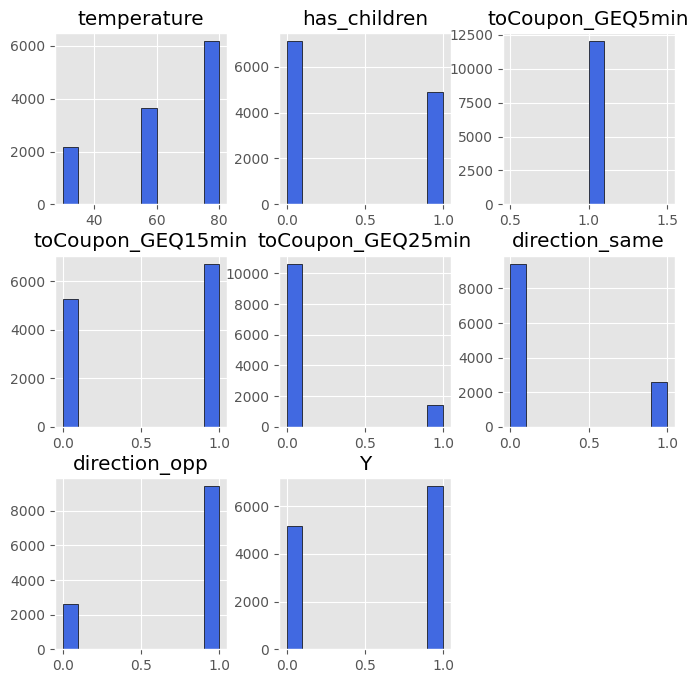

In [ ]:
df.hist(figsize=(8,8), bins=10, edgecolor = 'black', color='royalblue')
plt.show()

In [ ]:
df.describe()

temperature  has_children  toCoupon_GEQ5min  toCoupon_GEQ15min  \
count  12007.000000  12007.000000           12007.0       12007.000000   
mean      63.301408      0.408845               1.0           0.559507   
std       19.131641      0.491641               0.0           0.496467   
min       30.000000      0.000000               1.0           0.000000   
25%       55.000000      0.000000               1.0           0.000000   
50%       80.000000      0.000000               1.0           1.000000   
75%       80.000000      1.000000               1.0           1.000000   
max       80.000000      1.000000               1.0           1.000000   

       toCoupon_GEQ25min  direction_same  direction_opp             Y  
count       12007.000000    12007.000000   12007.000000  12007.000000  
mean            0.116266        0.215957       0.784043      0.568418  
std             0.320556        0.411502       0.411502      0.495317  
min             0.000000        0.000000       0.000000      0.000000  
25%             0.000000        0.000000       1.000000      0.000000  
50%             0.000000        0.000000       1.000000      1.000000  
75%             0.000000        0.000000       1.000000      1.000000  
max             1.000000        1.000000       1.000000      1.000000

##### 2.2 사용자 속성 변수 분포 확인

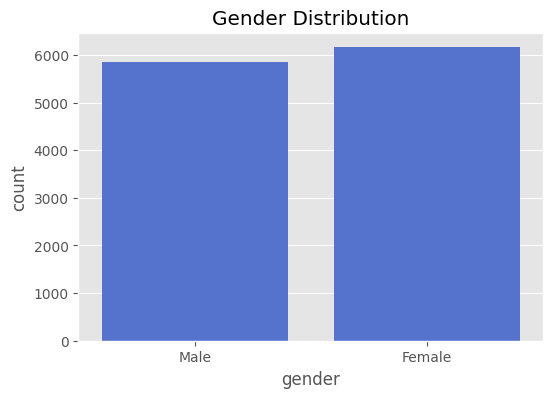

In [ ]:
# 성별
plt.figure(figsize=(6, 4))
sns.countplot(df, x='gender', color='royalblue')
plt.title('Gender Distribution')
plt.show()

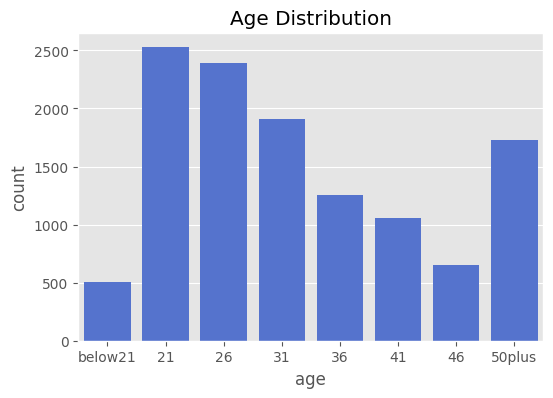

In [ ]:
# 나이
plt.figure(figsize=(6, 4))
sns.countplot(df, x='age', color='royalblue', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
plt.title('Age Distribution')
plt.show()

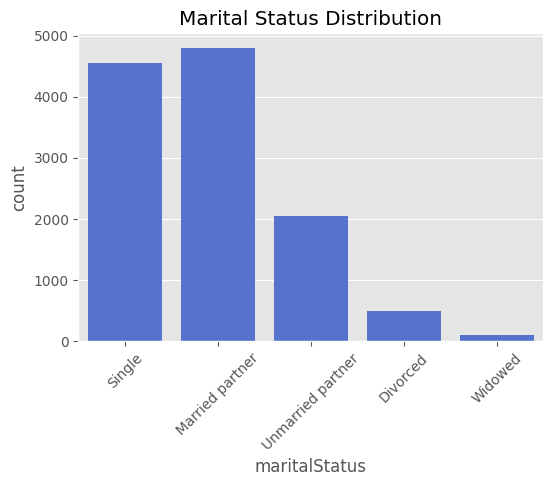

In [ ]:
# 결혼 여부
plt.figure(figsize=(6, 4))
sns.countplot(df, x='maritalStatus', color='royalblue')
plt.xticks(rotation=45)
plt.title('Marital Status Distribution')
plt.show()

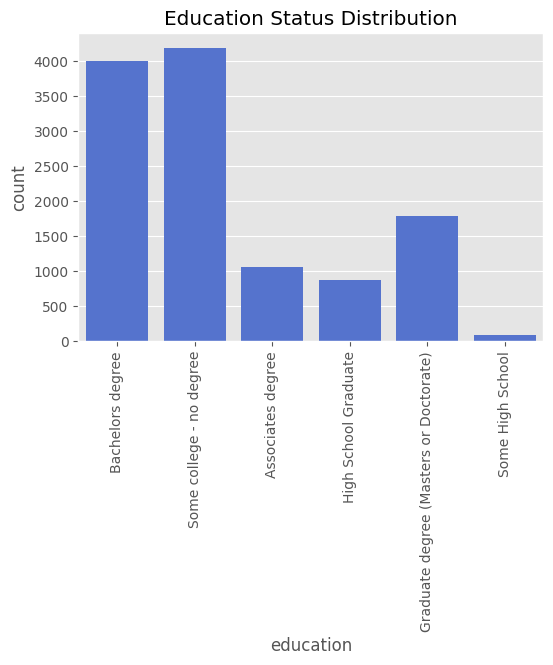

In [ ]:
# 학력
plt.figure(figsize=(6, 4))
sns.countplot(df, x='education', color='royalblue')
plt.xticks(rotation=90)
plt.title('Education Status Distribution')
plt.show()

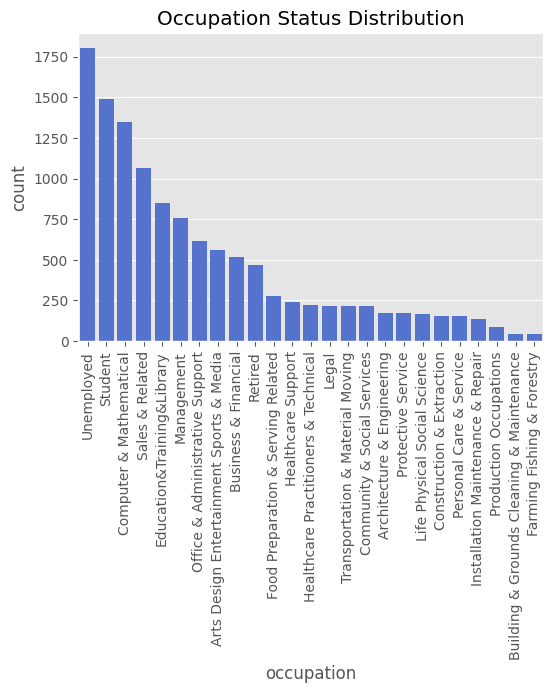

In [ ]:
# 직업
plt.figure(figsize=(6, 4))
sns.countplot(df, x='occupation', color='royalblue', order = df['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Occupation Status Distribution')
plt.show()

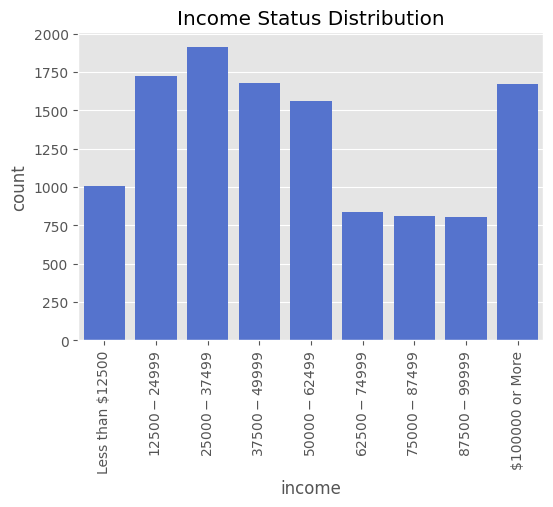

In [ ]:
# 연간 수입
plt.figure(figsize=(6, 4))
sns.countplot(df, x='income', color='royalblue', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
plt.xticks(rotation=90)
plt.title('Income Status Distribution')
plt.show()

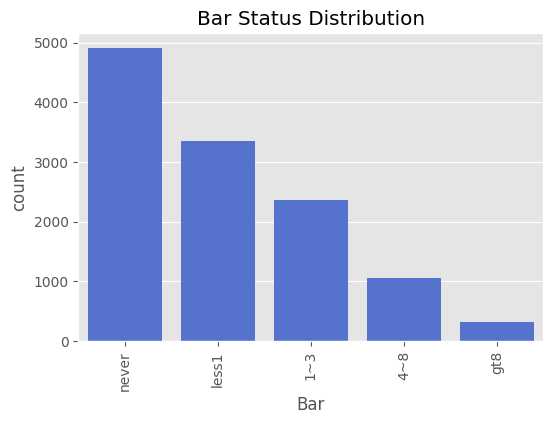

In [ ]:
# bar
plt.figure(figsize=(6, 4))
sns.countplot(df, x='Bar', color='royalblue', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Bar Status Distribution')
plt.show()

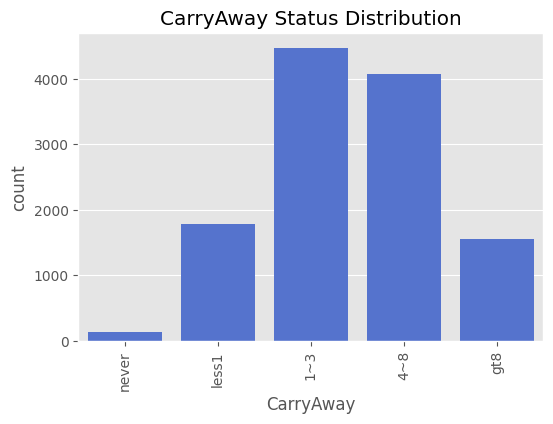

In [ ]:
# CarryAway
plt.figure(figsize=(6, 4))
sns.countplot(df, x='CarryAway', color='royalblue', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('CarryAway Status Distribution')
plt.show()

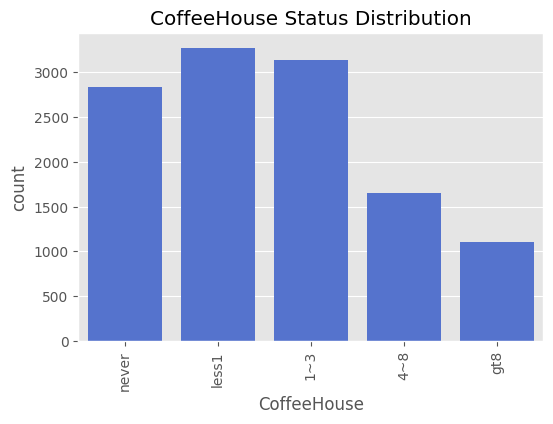

In [ ]:
# CoffeeHouse
plt.figure(figsize=(6, 4))
sns.countplot(df, x='CoffeeHouse', color='royalblue', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('CoffeeHouse Status Distribution')
plt.show()

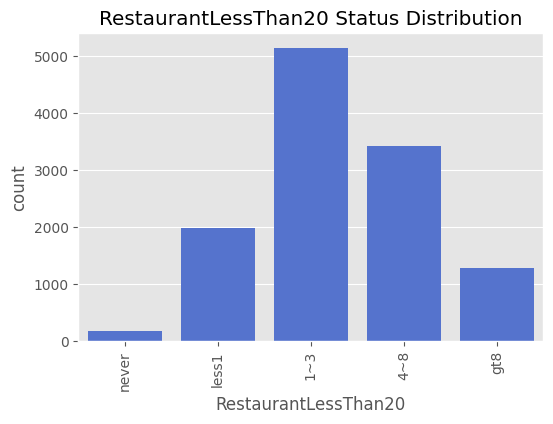

In [ ]:
# RestaurantLessThan20
plt.figure(figsize=(6, 4))
sns.countplot(df, x='RestaurantLessThan20', color='royalblue', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('RestaurantLessThan20 Status Distribution')
plt.show()

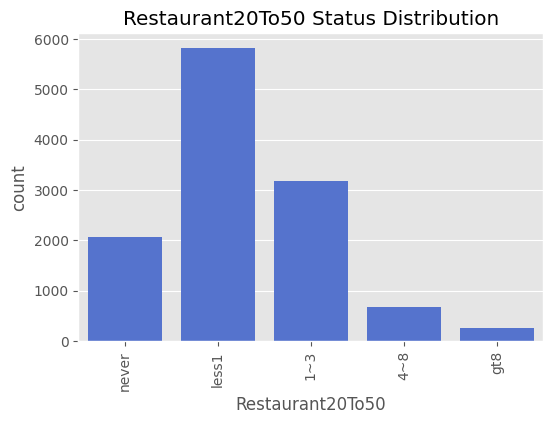

In [ ]:
# Restaurant20To50
plt.figure(figsize=(6, 4))
sns.countplot(df, x='Restaurant20To50', color='royalblue', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Restaurant20To50 Status Distribution')
plt.show()

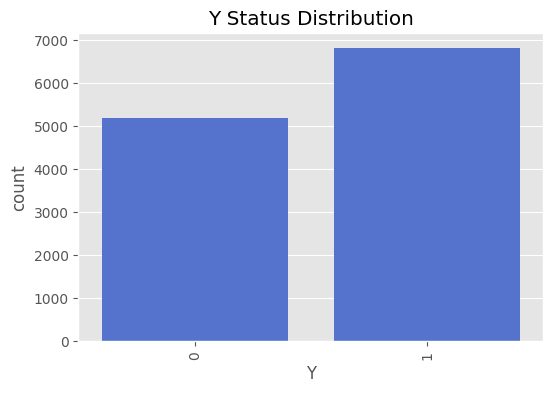

In [ ]:
# Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='Y', color='royalblue')
plt.xticks(rotation=90)
plt.title('Y Status Distribution')
plt.show()

##### 2.3 설문조사 상황별 쿠폰 수락 여부의 관계 파악

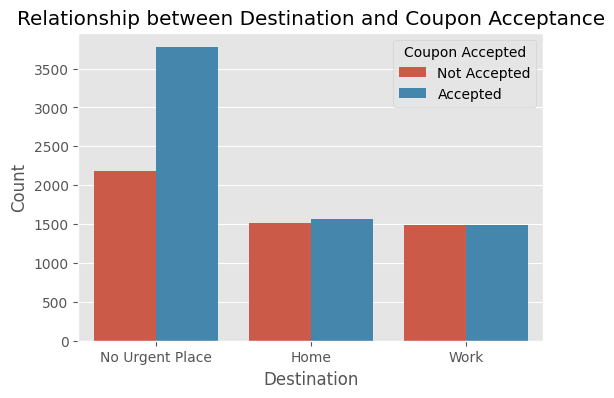

In [ ]:
# destination vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='destination', hue='Y')
plt.title('Relationship between Destination and Coupon Acceptance')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

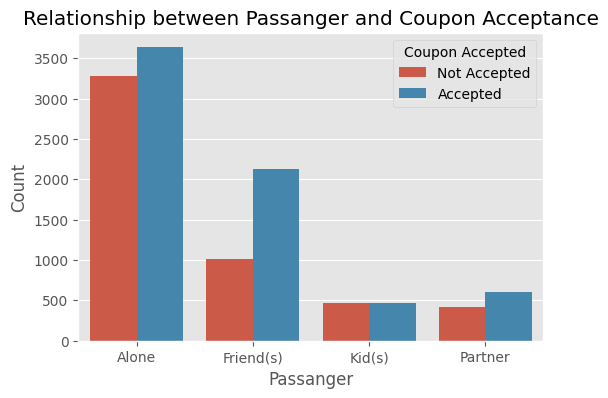

In [ ]:
# passanger vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='passanger', hue='Y')
plt.title('Relationship between Passanger and Coupon Acceptance')
plt.xlabel('Passanger')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

-> 범주형 변수이므로 변수 값 마다 개수의 차이가 있어 비율로 나타내는 것이 더 나을까..?

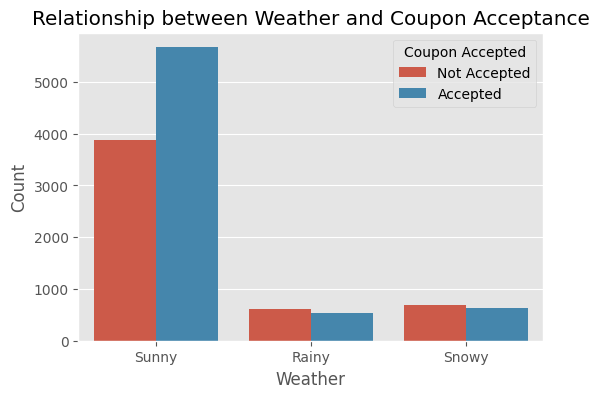

In [ ]:
# weather vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='weather', hue='Y')
plt.title('Relationship between Weather and Coupon Acceptance')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

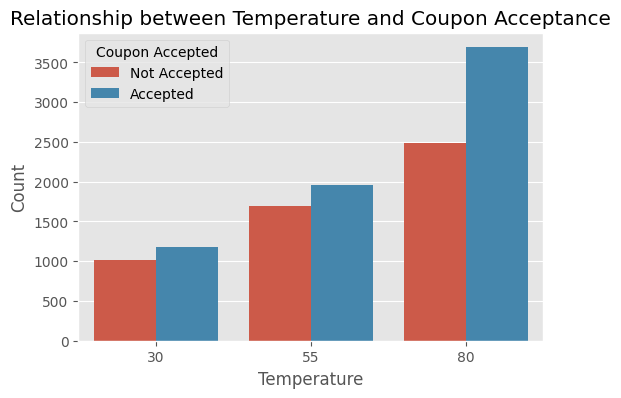

In [ ]:
# temperature vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='temperature', hue='Y')
plt.title('Relationship between Temperature and Coupon Acceptance')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

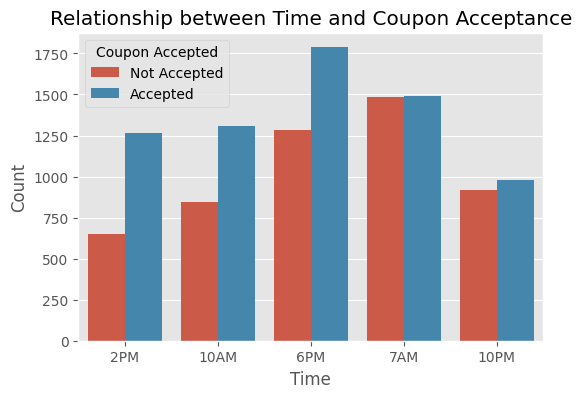

In [ ]:
# time vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='time', hue='Y')
plt.title('Relationship between Time and Coupon Acceptance')
plt.xlabel('Time')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

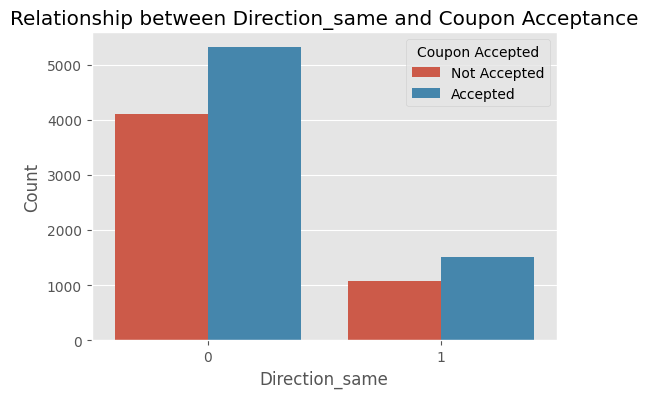

In [ ]:
# direction_same vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='direction_same', hue='Y')
plt.title('Relationship between Direction_same and Coupon Acceptance')
plt.xlabel('Direction_same')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

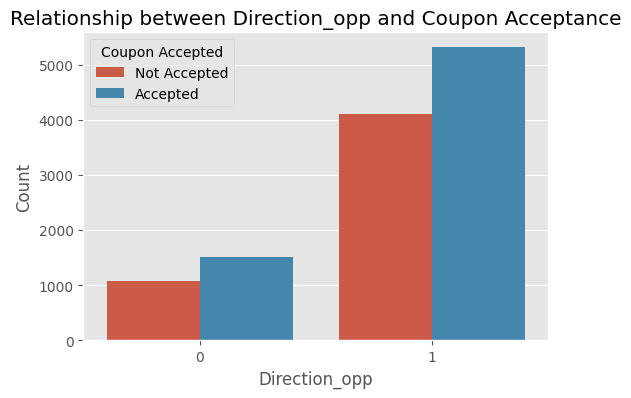

In [ ]:
# direction_opp vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='direction_opp', hue='Y')
plt.title('Relationship between Direction_opp and Coupon Acceptance')
plt.xlabel('Direction_opp')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

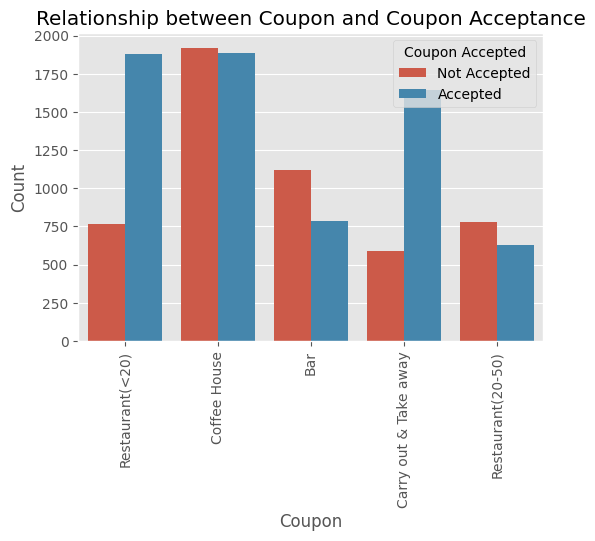

In [ ]:
# coupon vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='coupon', hue='Y')
plt.title('Relationship between Coupon and Coupon Acceptance')
plt.xticks(rotation=90)
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

##### 2.4 사용자 속성과 쿠폰 수락 여부의 관계 파악

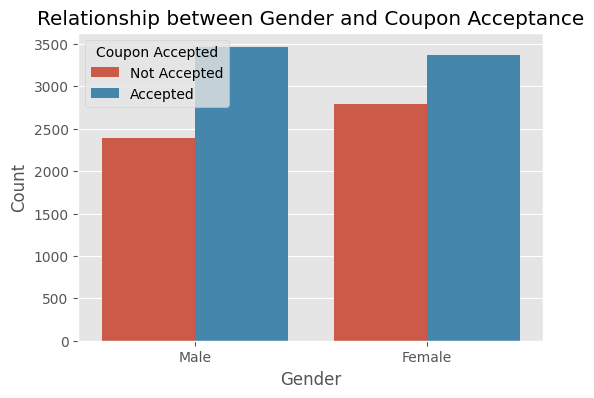

In [ ]:
# gender vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='gender', hue='Y')
plt.title('Relationship between Gender and Coupon Acceptance')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

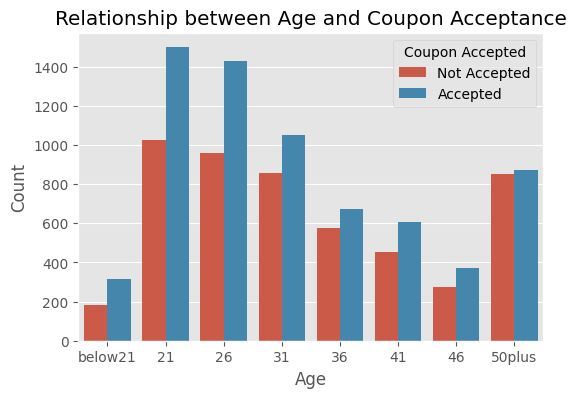

In [ ]:
# age vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='age', hue='Y', order=['below21', '21', '26', '31', '36', '41', '46', '50plus'])
plt.title('Relationship between Age and Coupon Acceptance')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

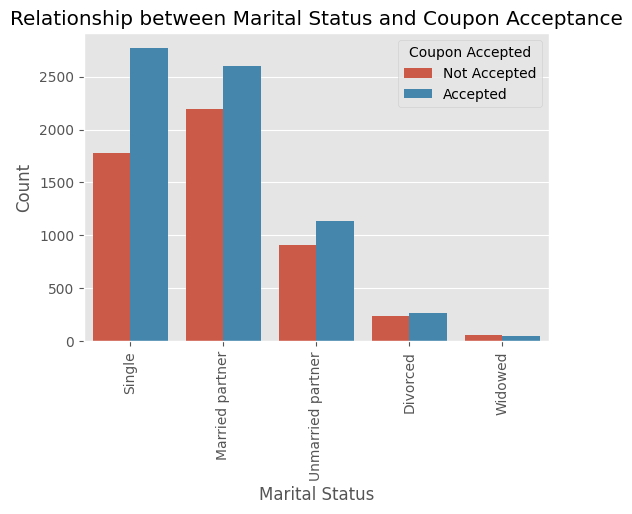

In [ ]:
# maritalStatus vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='maritalStatus', hue='Y')
plt.title('Relationship between Marital Status and Coupon Acceptance')
plt.xlabel('Marital Status')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

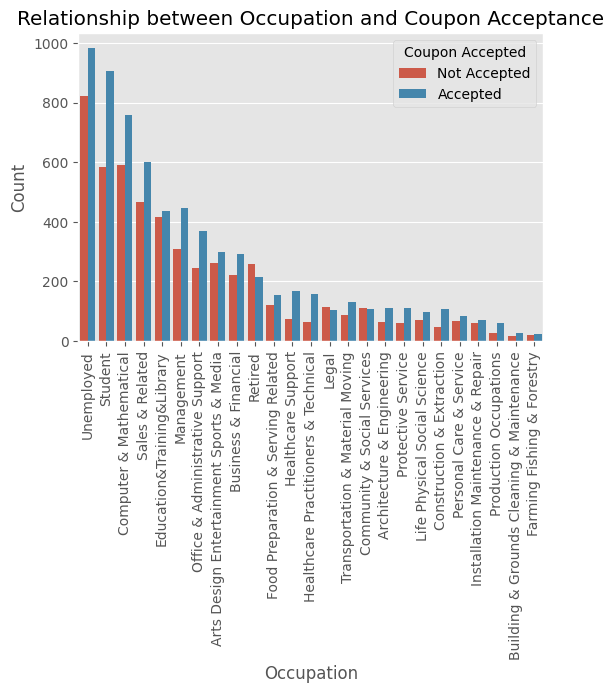

In [ ]:
# occupation vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='occupation',hue='Y', order = df['occupation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Relationship between Occupation and Coupon Acceptance')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

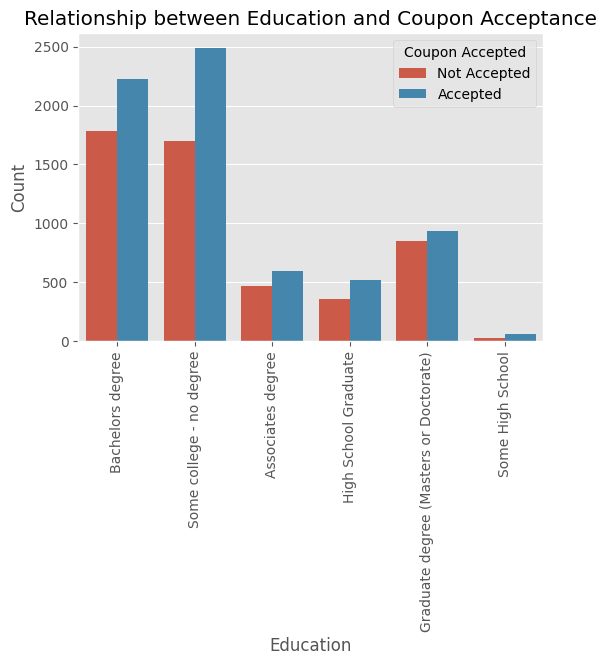

In [ ]:
# education vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='education',hue='Y')
plt.xticks(rotation=90)
plt.title('Relationship between Education and Coupon Acceptance')
plt.xlabel('Education')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

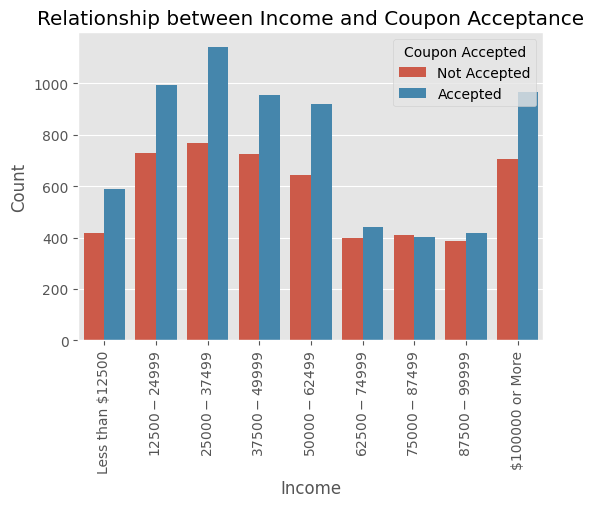

In [ ]:
# income vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='income',hue='Y', order=['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999', '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999', '$100000 or More'])
plt.xticks(rotation=90)
plt.title('Relationship between Income and Coupon Acceptance')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

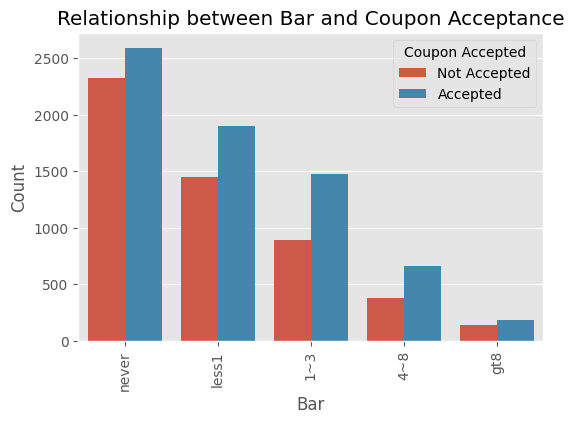

In [ ]:
# bar vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='Bar',hue='Y', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Relationship between Bar and Coupon Acceptance')
plt.xlabel('Bar')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

In [ ]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

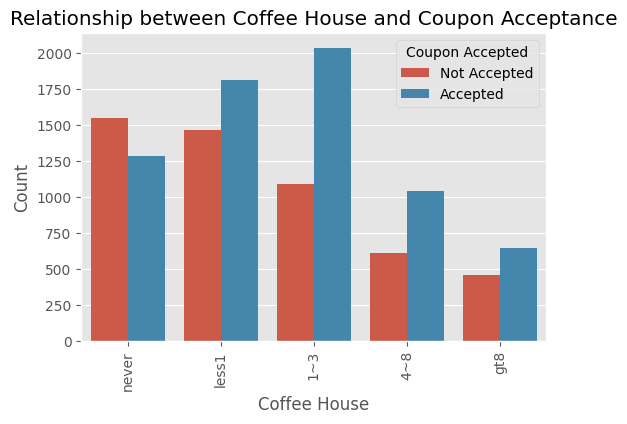

In [ ]:
# CoffeeHouse vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='CoffeeHouse',hue='Y', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Relationship between Coffee House and Coupon Acceptance')
plt.xlabel('Coffee House')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

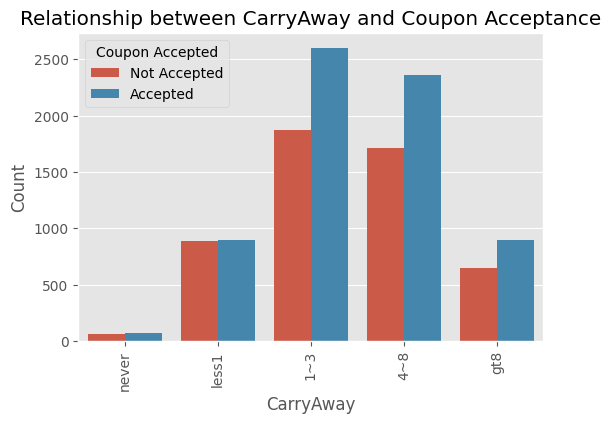

In [ ]:
# CarryAway vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='CarryAway',hue='Y', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Relationship between CarryAway and Coupon Acceptance')
plt.xlabel('CarryAway')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

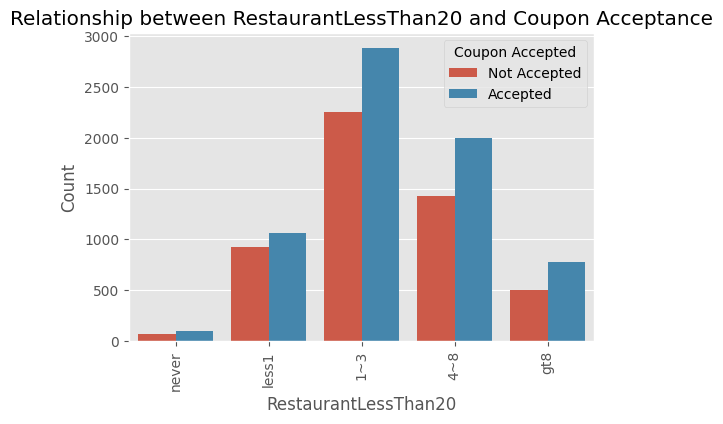

In [ ]:
# RestaurantLessThan20 vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='RestaurantLessThan20',hue='Y', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Relationship between RestaurantLessThan20 and Coupon Acceptance')
plt.xlabel('RestaurantLessThan20')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

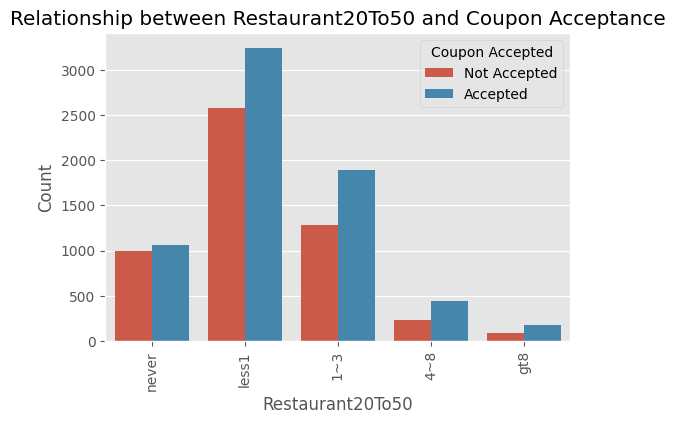

In [ ]:
# Restaurant20To50 vs Y
plt.figure(figsize=(6, 4))
sns.countplot(df, x='Restaurant20To50',hue='Y', order=['never', 'less1', '1~3', '4~8', 'gt8'])
plt.xticks(rotation=90)
plt.title('Relationship between Restaurant20To50 and Coupon Acceptance')
plt.xlabel('Restaurant20To50')
plt.ylabel('Count')
plt.legend(title='Coupon Accepted', labels=['Not Accepted', 'Accepted'])
plt.show()

##### 2.5 상관관계 분석(관계가 있을 것이라고 예상되는 컬럼들에 대하여)

In [ ]:
from scipy.stats import chi2_contingency

# Y, destination 상관관계 분석
observed = pd.crosstab(df['Y'], df['destination'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 205.040860381003
P-value: 2.991871149656568e-45


In [ ]:
from scipy.stats import chi2_contingency

# Y, time 상관관계 분석
observed = pd.crosstab(df['Y'], df['time'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 160.21116859568252
P-value: 1.3171569481968996e-33


In [ ]:
from scipy.stats import chi2_contingency

# Y, coupon 상관관계 분석
observed = pd.crosstab(df['Y'], df['coupon'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 828.547455888044
P-value: 5.029680670594935e-178


In [ ]:
from scipy.stats import chi2_contingency

# Y, direction_same 상관관계 분석
observed = pd.crosstab(df['Y'], df['direction_same'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 2.5398488721548764
P-value: 0.11100541086387662


In [ ]:
from scipy.stats import chi2_contingency

# Y, direction_opp 상관관계 분석
observed = pd.crosstab(df['Y'], df['direction_opp'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 2.5398488721548764
P-value: 0.11100541086387662


In [ ]:
from scipy.stats import chi2_contingency

# Y, passanger 상관관계 분석
observed = pd.crosstab(df['Y'], df['passanger'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 222.29621357290756
P-value: 6.402318898040293e-48


In [ ]:
from scipy.stats import chi2_contingency

# Y, weather 상관관계 분석
observed = pd.crosstab(df['Y'], df['weather'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 120.9760329719623
P-value: 5.375120674643041e-27


In [ ]:
from scipy.stats import chi2_contingency

# Y, temperature 상관관계 분석
observed = pd.crosstab(df['Y'], df['temperature'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 44.66681585287516
P-value: 1.9985921416348208e-10


In [ ]:
from scipy.stats import chi2_contingency

# Y, gender 상관관계 분석
observed = pd.crosstab(df['Y'], df['gender'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 24.33483509392881
P-value: 8.096160770453931e-07


In [ ]:
from scipy.stats import chi2_contingency

# Y, age 상관관계 분석
observed = pd.crosstab(df['Y'], df['age'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 58.60519064474616
P-value: 2.864595870139458e-10


In [ ]:
from scipy.stats import chi2_contingency

# Y, maritalStatus 상관관계 분석
observed = pd.crosstab(df['Y'], df['maritalStatus'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 53.34758464949464
P-value: 7.207553245822514e-11


In [ ]:
from scipy.stats import chi2_contingency

# Y, has_Children 상관관계 분석
observed = pd.crosstab(df['Y'], df['has_children'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 27.478876770233256
P-value: 1.588196836823028e-07


In [ ]:
from scipy.stats import chi2_contingency

# Y, education 상관관계 분석
observed = pd.crosstab(df['Y'], df['education'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 39.05045824570509
P-value: 2.3199421402814165e-07


In [ ]:
from scipy.stats import chi2_contingency

# Y, occupation 상관관계 분석
observed = pd.crosstab(df['Y'], df['occupation'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 131.71651946443194
P-value: 7.577511093667135e-17


In [ ]:
from scipy.stats import chi2_contingency

# Y, income 상관관계 분석
observed = pd.crosstab(df['Y'], df['income'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 43.947976587164966
P-value: 5.819809976530714e-07


In [ ]:
from scipy.stats import chi2_contingency

# Y, Bar 상관관계 분석
observed = pd.crosstab(df['Y'], df['Bar'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 82.6288253720358
P-value: 4.8291074051359154e-17


In [ ]:
from scipy.stats import chi2_contingency

# Y, CoffeeHouse 상관관계 분석
observed = pd.crosstab(df['Y'], df['CoffeeHouse'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 271.96759480476857
P-value: 1.201313510171182e-57


In [ ]:
from scipy.stats import chi2_contingency

# Y, CarryAway 상관관계 분석
observed = pd.crosstab(df['Y'], df['CarryAway'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 39.65337341278135
P-value: 5.105044745636377e-08


In [ ]:
from scipy.stats import chi2_contingency

# Y, RestaurantLessThan20 상관관계 분석
observed = pd.crosstab(df['Y'], df['RestaurantLessThan20'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 20.590096803176028
P-value: 0.00038177315285114306


In [ ]:
from scipy.stats import chi2_contingency

# Y, Restaurant20To50 상관관계 분석
observed = pd.crosstab(df['Y'], df['Restaurant20To50'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 66.6833933960325
P-value: 1.1368596564516987e-13


In [ ]:
from scipy.stats import chi2_contingency

# Y, toCoupon_GEQ15min 상관관계 분석
observed = pd.crosstab(df['Y'], df['toCoupon_GEQ15min'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 82.10126726948398
P-value: 1.2928968525908586e-19


In [ ]:
from scipy.stats import chi2_contingency

# Y, toCoupon_GEQ25min 상관관계 분석
observed = pd.crosstab(df['Y'], df['toCoupon_GEQ25min'])
chi2, p, dof, expected = chi2_contingency(observed)

print(f"Chi-square value: {chi2}")
print(f"P-value: {p}")

Chi-square value: 132.1826188310771
P-value: 1.3646971331371066e-30


모든 컬럼과 쿠폰 수락 여부의 상관관계(카이제곱 검정) 분석을 해본 결과, 유의한 관련성(유의수준 0.05)이 있다고 볼 수 있는 변수는 다음과 같다.
- 'RestaurantLessThan20'(매달 1인당 평균 지출이 20달러 미만인 레스토랑 방문 횟수)
- 'coupon'(쿠폰)
- 'gender'(성별)
- 'age'(나이)
- 'occupation'(직업)
- 'income'(소득)

In [ ]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

#####2.6 단일 변수 분석

In [ ]:
def percent_value_counts(df, feature):
    data = pd.DataFrame(sorted(list(df[feature].unique())),columns=[feature])
    data['Total_Count'] = list(df.groupby(feature).Y.count())
    data['Total_%'] = round(data['Total_Count']/df[feature].shape[0]*100,3)
    data['Accepted'] = list(df[df.Y==1].groupby(feature).Y.count())
    data['Rejected'] = list(df[df.Y==0].groupby(feature).Y.count())
    data['%Accepted'] = round(data['Accepted']/data['Total_Count']*100,3)
    data['%Rejected'] = round(data['Rejected']/data['Total_Count']*100,3)
    return data

In [ ]:
def univariate_analysis(df, feature):
    df_EDA = percent_value_counts(df, feature)
    df_EDA = df_EDA.sort_values(by='Total_Count', ascending=False)

    fig = plt.subplots(figsize =(8, 4))
    plt.barh(df_EDA[feature],df_EDA['Total_Count'])
    plt.barh(df_EDA[feature],df_EDA['Accepted'])
    plt.legend(labels=['Total','Accepted'])
    plt.xlabel('Counts')
    plt.title(feature+' wise accepted coupons')
    plt.show()

    return df_EDA

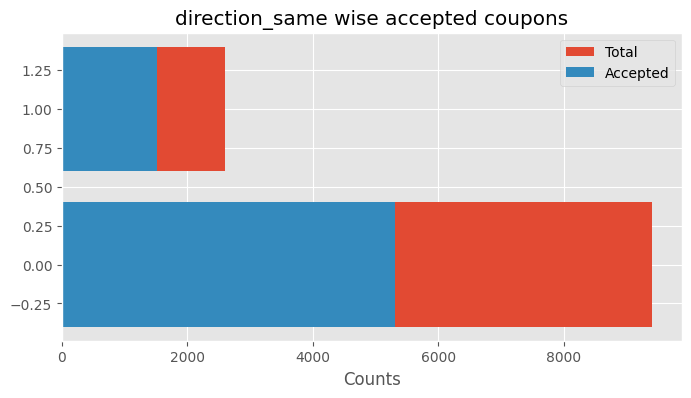

direction_same  Total_Count  Total_%  Accepted  Rejected  %Accepted  \
0               0         9414   78.404      5315      4099     56.458   
1               1         2593   21.596      1510      1083     58.234   

   %Rejected  
0     43.542  
1     41.766

In [ ]:
# direction_same
univariate_analysis(df, 'direction_same')

direction_same 컬럼의 경우, 약 78%는 0, 22%는 1의 값을 가지지만 쿠폰 수락 여부에 있어서는 거의 동일한 비율을 지니고 있으므로, 쿠폰 수락 여부가 direction_same 컬럼에 영향을 받는다고 보기 어려움

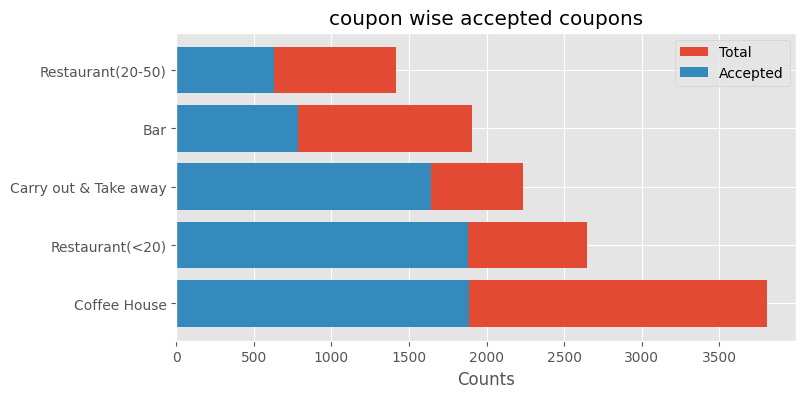

coupon  Total_Count  Total_%  Accepted  Rejected  %Accepted  \
2           Coffee House         3809   31.723      1888      1921     49.567   
4        Restaurant(<20)         2646   22.037      1878       768     70.975   
1  Carry out & Take away         2233   18.597      1643       590     73.578   
0                    Bar         1906   15.874       785      1121     41.186   
3      Restaurant(20-50)         1413   11.768       631       782     44.657   

   %Rejected  
2     50.433  
4     29.025  
1     26.422  
0     58.814  
3     55.343

In [ ]:
# coupon
univariate_analysis(df,'coupon')

- 총 개수가 가장 많은 쿠폰의 종류는 Coffe House
- 쿠폰 수락 비율이 가장 많은 쿠폰은 Carry out & Take away와 Restaurant(<20)	(20$ 미만 레스토랑)
- Bar 쿠폰은 가장 낮은 쿠폰 수락 비율을 보임

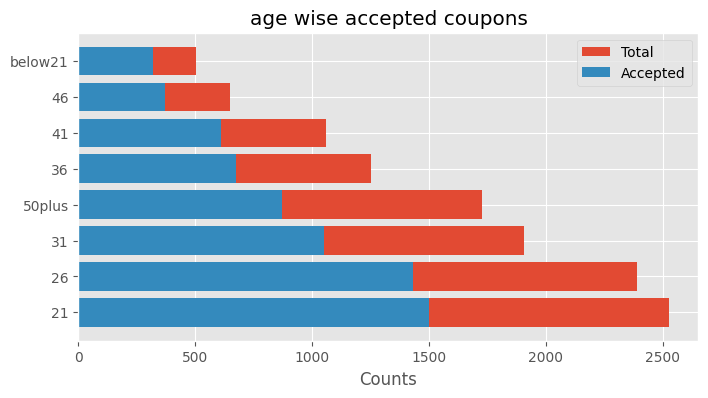

age  Total_Count  Total_%  Accepted  Rejected  %Accepted  %Rejected
0       21         2526   21.038      1499      1027     59.343     40.657
1       26         2388   19.888      1431       957     59.925     40.075
2       31         1906   15.874      1051       855     55.142     44.858
6   50plus         1725   14.367       872       853     50.551     49.449
3       36         1251   10.419       674       577     53.877     46.123
4       41         1061    8.837       609       452     57.399     42.601
5       46          648    5.397       372       276     57.407     42.593
7  below21          502    4.181       317       185     63.147     36.853

In [ ]:
# age
univariate_analysis(df,'age')

- 이 설문조사 참여자가 가장 많이 속한 연령대는 20대
- 21세 미만인 사용자가 가장 높은 쿠폰 수락 비율을 보임
- 50세 이상인 사용자가 가장 낮은 쿠폰 수락 비율을 보임

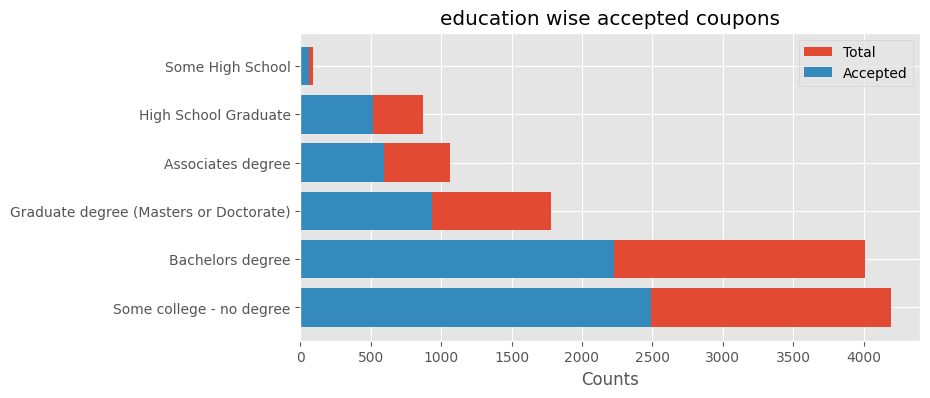

education  Total_Count  Total_%  Accepted  \
5                Some college - no degree         4194   34.930      2491   
1                        Bachelors degree         4010   33.397      2229   
2  Graduate degree (Masters or Doctorate)         1783   14.850       933   
0                       Associates degree         1061    8.837       592   
3                    High School Graduate          871    7.254       517   
4                        Some High School           88    0.733        63   

   Rejected  %Accepted  %Rejected  
5      1703     59.394     40.606  
1      1781     55.586     44.414  
2       850     52.328     47.672  
0       469     55.796     44.204  
3       354     59.357     40.643  
4        25     71.591     28.409

In [ ]:
univariate_analysis(df,'education')

- 대부분의 설문조사 참여자의 최종 학력은 Some college - no degree, Bachelors degree에 속함
- 최종 학력이 some high school인 참여자가 가장 적지만, 가장 높은 쿠폰 수락 비율을 보임
- graduate degree에 속하는 참여자가 가장 낮은 쿠폰 수락 비율을 보임

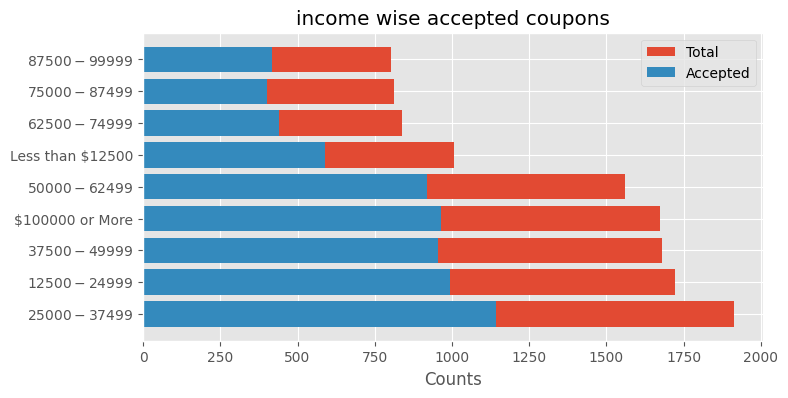

income  Total_Count  Total_%  Accepted  Rejected  %Accepted  \
2   $25000 - $37499         1912   15.924      1142       770     59.728   
1   $12500 - $24999         1722   14.342       993       729     57.666   
3   $37500 - $49999         1680   13.992       956       724     56.905   
0   $100000 or More         1673   13.934       966       707     57.741   
4   $50000 - $62499         1561   13.001       919       642     58.873   
8  Less than $12500         1006    8.378       590       416     58.648   
5   $62500 - $74999          837    6.971       440       397     52.569   
6   $75000 - $87499          813    6.771       401       412     49.323   
7   $87500 - $99999          803    6.688       418       385     52.055   

   %Rejected  
2     40.272  
1     42.334  
3     43.095  
0     42.259  
4     41.127  
8     41.352  
5     47.431  
6     50.677  
7     47.945

In [ ]:
# income
univariate_analysis(df,'income')

- 수입이 \$25000 ~ \$37499에 속하는 참여자가 가장 많고, 이들의 쿠폰 수락 비율이 가장 높음
- 수입이 \$75000 ~ \$87499에 속하는 참여자가 가장 낮은 쿠폰 수락 비율을 보임

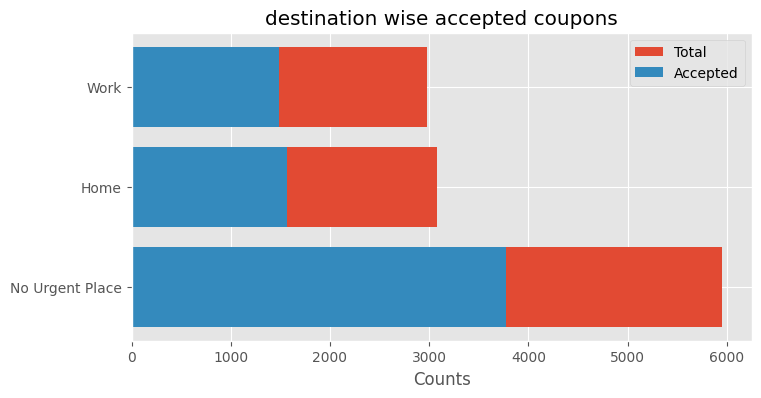

destination  Total_Count  Total_%  Accepted  Rejected  %Accepted  \
1  No Urgent Place         5953   49.579      3772      2181     63.363   
0             Home         3078   25.635      1564      1514     50.812   
2             Work         2976   24.786      1489      1487     50.034   

   %Rejected  
1     36.637  
0     49.188  
2     49.966

In [ ]:
# destination
univariate_analysis(df,'destination')

- 목적지가 No Urgent Place에 속하는 참가자가 가장 많고, 쿠폰 수락 비율도 가장 높음
- 목적지가 home, work인 경우, 비슷한 쿠폰 수락 비율을 보임

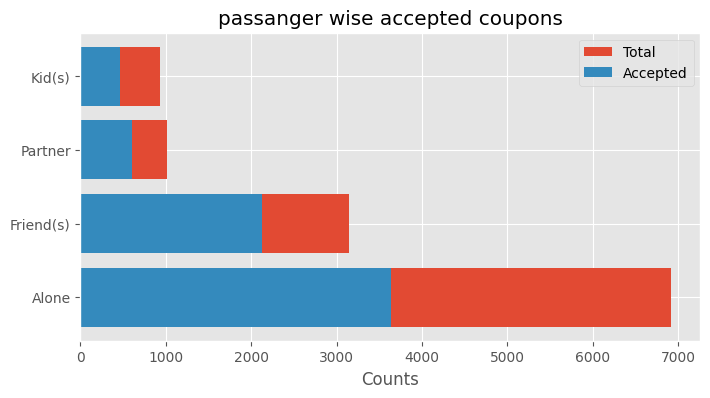

passanger  Total_Count  Total_%  Accepted  Rejected  %Accepted  %Rejected
0      Alone         6914   57.583      3634      3280     52.560     47.440
1  Friend(s)         3142   26.168      2124      1018     67.600     32.400
3    Partner         1018    8.478       604       414     59.332     40.668
2     Kid(s)          933    7.770       463       470     49.625     50.375

In [ ]:
# passanger
univariate_analysis(df,'passanger')

- 혼자 타고 있는 경우가 가장 많음
- 친구와 함께 있을 경우, 쿠폰 수락 비율이 가장 높음
- 아이와 함께 있을 때, 쿠폰 수락 비율이 가장 낮음

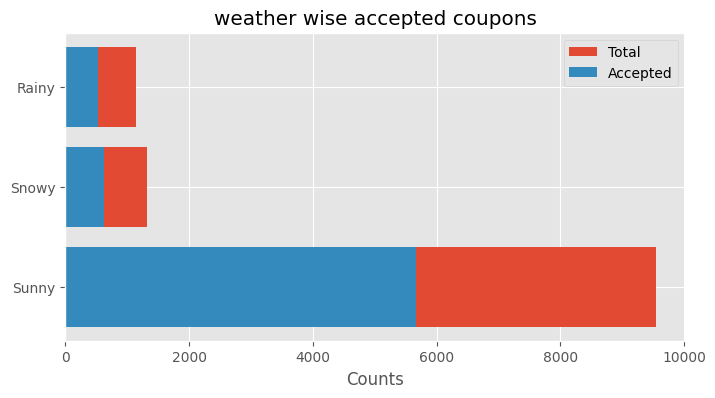

weather  Total_Count  Total_%  Accepted  Rejected  %Accepted  %Rejected
2   Sunny         9545   79.495      5666      3879     59.361     40.639
1   Snowy         1323   11.019       632       691     47.770     52.230
0   Rainy         1139    9.486       527       612     46.269     53.731

In [ ]:
# weather
univariate_analysis(df,'weather')

- 맑은 날씨가 가장 많고, 이 때의 쿠폰 수락 비율이 가장 높음

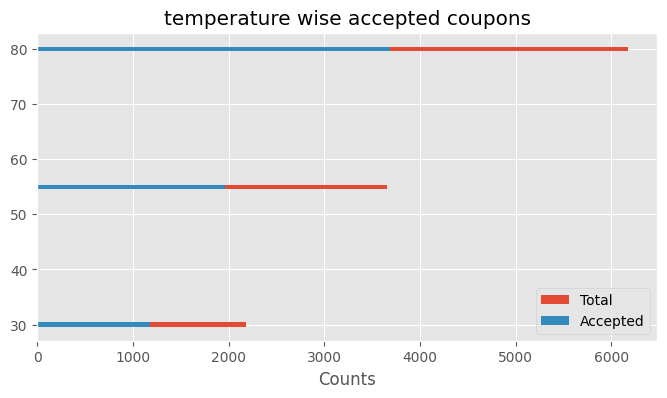

temperature  Total_Count  Total_%  Accepted  Rejected  %Accepted  %Rejected
2           80         6171   51.395      3689      2482     59.780     40.220
1           55         3652   30.416      1962      1690     53.724     46.276
0           30         2184   18.189      1174      1010     53.755     46.245

In [ ]:
# temperature
univariate_analysis(df,'temperature')

- 기온이 80F일 때가 가장 많으며, 이 때의 쿠폰 수락 비율이 가장 높음

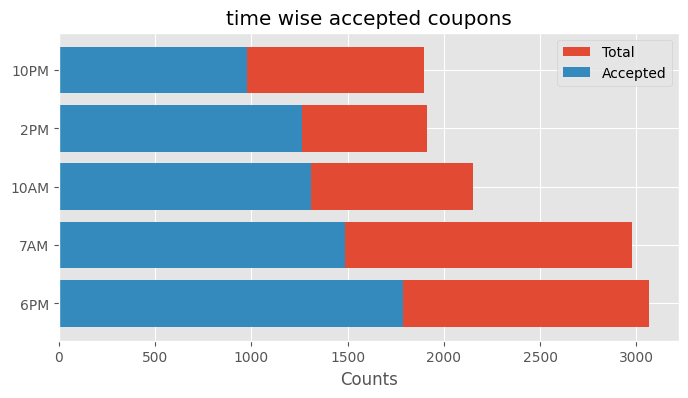

time  Total_Count  Total_%  Accepted  Rejected  %Accepted  %Rejected
3   6PM         3068   25.552      1787      1281     58.246     41.754
4   7AM         2976   24.786      1489      1487     50.034     49.966
0  10AM         2154   17.940      1308       846     60.724     39.276
2   2PM         1913   15.932      1264       649     66.074     33.926
1  10PM         1896   15.791       977       919     51.530     48.470

In [ ]:
# time
univariate_analysis(df,'time')

- 6PM과 7AM(출퇴근 시간)이 가장 많음
- 쿠폰 수락 비율은 2PM이 가장 높음
- 7AM(출근 시간)이 가장 낮은 쿠폰 수락 비율을 보임

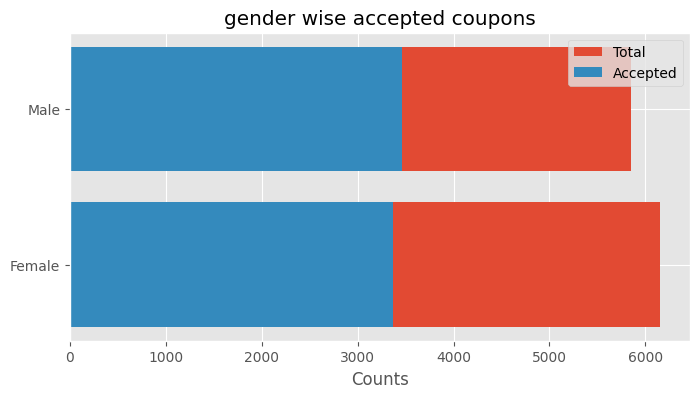

gender  Total_Count  Total_%  Accepted  Rejected  %Accepted  %Rejected
0  Female         6158   51.287      3366      2792     54.661     45.339
1    Male         5849   48.713      3459      2390     59.138     40.862

In [ ]:
# gender
univariate_analysis(df,'gender')

- 성별은 남성과 여성의 차이가 거의 없으나, 여성의 비율이 조금 더 높음
- 쿠폰 수락 여부는 남성이 더 높음

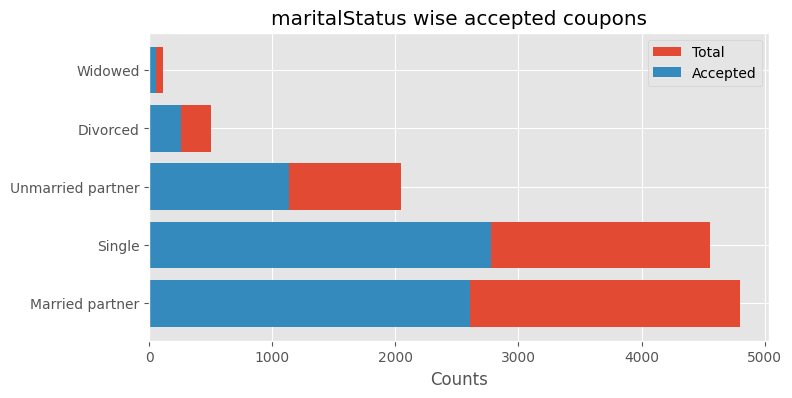

maritalStatus  Total_Count  Total_%  Accepted  Rejected  %Accepted  \
1    Married partner         4799   39.968      2603      2196     54.240   
2             Single         4554   37.928      2773      1781     60.892   
3  Unmarried partner         2047   17.048      1137       910     55.545   
0           Divorced          499    4.156       261       238     52.305   
4            Widowed          108    0.899        51        57     47.222   

   %Rejected  
1     45.760  
2     39.108  
3     44.455  
0     47.695  
4     52.778

In [ ]:
# maritalStatus
univariate_analysis(df,'maritalStatus')

- Married Partner상태인 경우가 가장 많음
- Single인 경우 가장 쿠폰 수락 여부가 높음
- Widowed인 경우 쿠폰 수락 여부가 가장 낮음

Q1. 언제 어떤 쿠폰의 수락 비율이 가장 높을까?

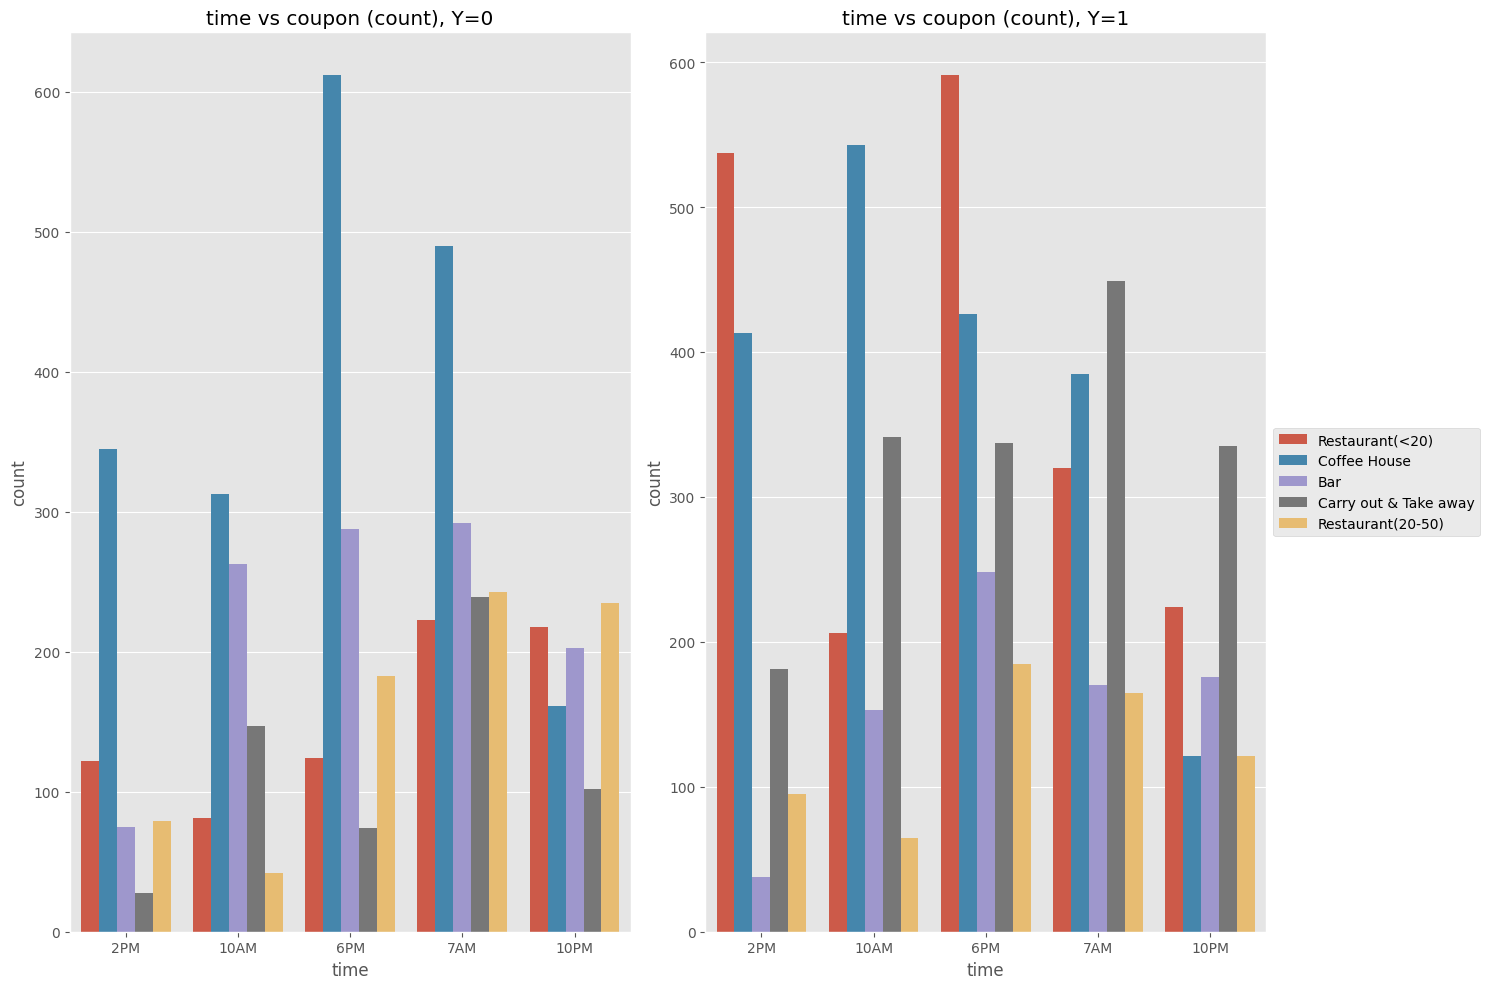

In [ ]:
coupon_order = df['coupon'].unique()
time_order = df['time'].unique()

fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Plot for 'destination' vs 'passenger', Y=0
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 0], ax=axes[0], order=time_order, hue_order=coupon_order)
axes[0].set_title('time vs coupon (count), Y=0')
axes[0].legend().remove()


# Plot for 'destination' vs 'passenger', Y=1
sns.countplot(x='time', hue='coupon', data=df[df['Y'] == 1], ax=axes[1], order=time_order, hue_order=coupon_order)
axes[1].set_title('time vs coupon (count), Y=1')

# Set legend on the right
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.tight_layout()
plt.show()

- 2PM, 6PM에는 20$ 미만인 레스토랑 쿠폰이 가장 수락 여부가 높음
- 10AM에는 Coffee house의 쿠폰 수락 비율이 가장 높음
- 7AM, 10PM에는 Carry out & Take away 쿠폰 수락 비율이 가장 높음

### Classfication model 분류 성능 비교

#### 3.1 Classification 모델 성능 비교

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


##### 전체 변수에 대하여 분류 모델 수행

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
from sklearn.base import TransformerMixin, BaseEstimator

class InteractionTermsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        self.categorical_cols = categorical_cols
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if X.size == 0:  # 배열이 비어있는 경우
            return X

        for col1, col2 in itertools.combinations(self.categorical_cols, 2):
            new_col = f"{col1}_{col2}"
            if isinstance(col1, str) and isinstance(col2, str):
                try:
                    col1_idx = np.where(X[:, 0] == col1)[0][0]
                    col2_idx = np.where(X[:, 0] == col2)[0][0]
                    new_col_values = self.encoder.fit_transform(X[:, col1_idx].astype(str) + "_" + X[:, col2_idx].astype(str))
                except IndexError:  # 열이 없는 경우
                    continue
            else:
                new_col_values = self.encoder.fit_transform(X[:, col1].astype(str) + "_" + X[:, col2].astype(str))
            X = np.c_[X, new_col_values]
        return X


# 타겟 변수와 특징 분리
X = df.drop('Y', axis=1)
y = df['Y']

# 범주형 특징 선택
categorical_cols = X.columns.astype('str').tolist()

# 인코딩 파이프라인 구성
categorical_transformer = ColumnTransformer(
    transformers=[
        ('target', TargetEncoder(), categorical_cols)
    ], remainder='passthrough')

# 상호작용 항 추가 함수
def add_interaction_terms(X):
    encoder = LabelEncoder()
    for col1, col2 in itertools.combinations(categorical_cols, 2):
        new_col = f"{col1}_{col2}"
        X[new_col] = encoder.fit_transform(X[col1].astype(str) + "_" + X[col2].astype(str))
    return X

# 전처리 파이프라인
#interaction_transformer = InteractionTermsTransformer(categorical_cols)
preprocess_pipeline = Pipeline([
    ('categorical', categorical_transformer),
    ('interaction', InteractionTermsTransformer(categorical_cols))
])

# 전처리 및 데이터 분할
X_processed = preprocess_pipeline.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 모델 초기화
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'{name} Model:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print('---')

Decision Tree Model:
Accuracy: 0.6881765195670275
Precision: 0.738367658276125
Recall: 0.7045123726346434
F1 Score: 0.7210428305400373
---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Model:
Accuracy: 0.6473771856786011
Precision: 0.6750830564784053
Recall: 0.7394468704512372
F1 Score: 0.7058006252170892
---
Random Forest Model:
Accuracy: 0.7527060782681099
Precision: 0.7693370165745856
Recall: 0.8107714701601164
F1 Score: 0.7895109851169384
---
Gradient Boosting Model:
Accuracy: 0.7139883430474604
Precision: 0.7360824742268042
Recall: 0.7794759825327511
F1 Score: 0.7571580063626723
---
Naive Bayes Model:
Accuracy: 0.6619483763530392
Precision: 0.6880856760374833
Recall: 0.7481804949053857
F1 Score: 0.7168758716875872
---
K-Nearest Neighbors Model:
Accuracy: 0.6661115736885929
Precision: 0.7054597701149425
Recall: 0.7147016011644832
F1 Score: 0.7100506146059291
---


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


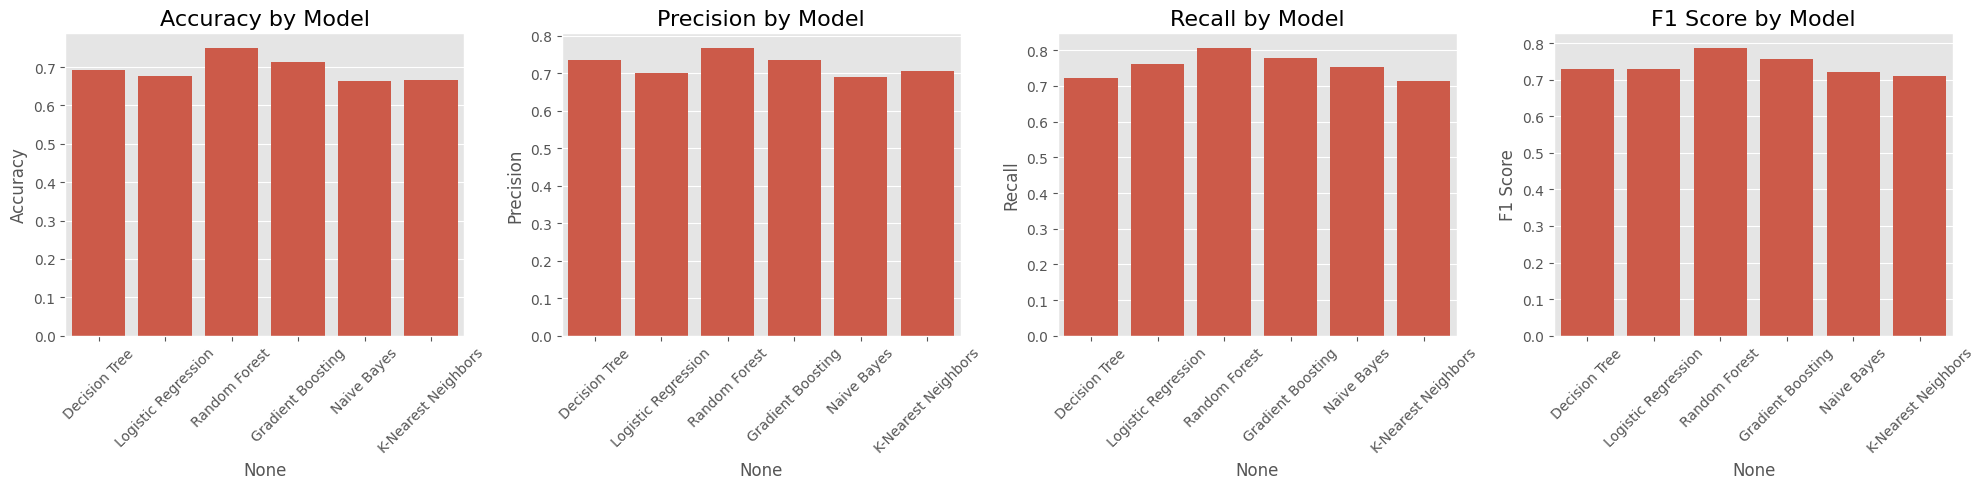

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 이름과 성능 지표를 저장할 딕셔너리
model_metrics = {}

# 모델 학습 및 평가 루프
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# 성능 지표 DataFrame 생성
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

# 모델 성능 막대 그래프 시각화
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model', fontsize=16)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### 유의미하다고 판단된 변수에 대해서 분류 모델 수행

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import itertools
from sklearn.base import TransformerMixin, BaseEstimator

class InteractionTermsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_cols):
        self.categorical_cols = categorical_cols
        self.encoder = LabelEncoder()

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if X.size == 0:  # 배열이 비어있는 경우
            return X

        for col1, col2 in itertools.combinations(self.categorical_cols, 2):
            new_col = f"{col1}_{col2}"
            if isinstance(col1, str) and isinstance(col2, str):
                try:
                    col1_idx = np.where(X[:, 0] == col1)[0][0]
                    col2_idx = np.where(X[:, 0] == col2)[0][0]
                    new_col_values = self.encoder.fit_transform(X[:, col1_idx].astype(str) + "_" + X[:, col2_idx].astype(str))
                except IndexError:  # 열이 없는 경우
                    continue
            else:
                new_col_values = self.encoder.fit_transform(X[:, col1].astype(str) + "_" + X[:, col2].astype(str))
            X = np.c_[X, new_col_values]
        return X


# 타겟 변수와 특징 분리
X = df[['RestaurantLessThan20','coupon', 'gender', 'age', 'occupation', 'income']]
y = df['Y']

# 범주형 특징 선택
categorical_cols = X.columns.astype('str').tolist()

# 인코딩 파이프라인 구성
categorical_transformer = ColumnTransformer(
    transformers=[
        ('target', TargetEncoder(), categorical_cols)
    ], remainder='passthrough')

# 상호작용 항 추가 함수
def add_interaction_terms(X):
    encoder = LabelEncoder()
    for col1, col2 in itertools.combinations(categorical_cols, 2):
        new_col = f"{col1}_{col2}"
        X[new_col] = encoder.fit_transform(X[col1].astype(str) + "_" + X[col2].astype(str))
    return X

# 전처리 파이프라인
#interaction_transformer = InteractionTermsTransformer(categorical_cols)
preprocess_pipeline = Pipeline([
    ('categorical', categorical_transformer),
    ('interaction', InteractionTermsTransformer(categorical_cols))
])

# 전처리 및 데이터 분할
X_processed = preprocess_pipeline.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 모델 초기화
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'{name} Model:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print('---')

Gradient Boosting Model:
Accuracy: 0.6357202331390508
Precision: 0.6664442961974649
Recall: 0.7270742358078602
F1 Score: 0.6954403063000347
---


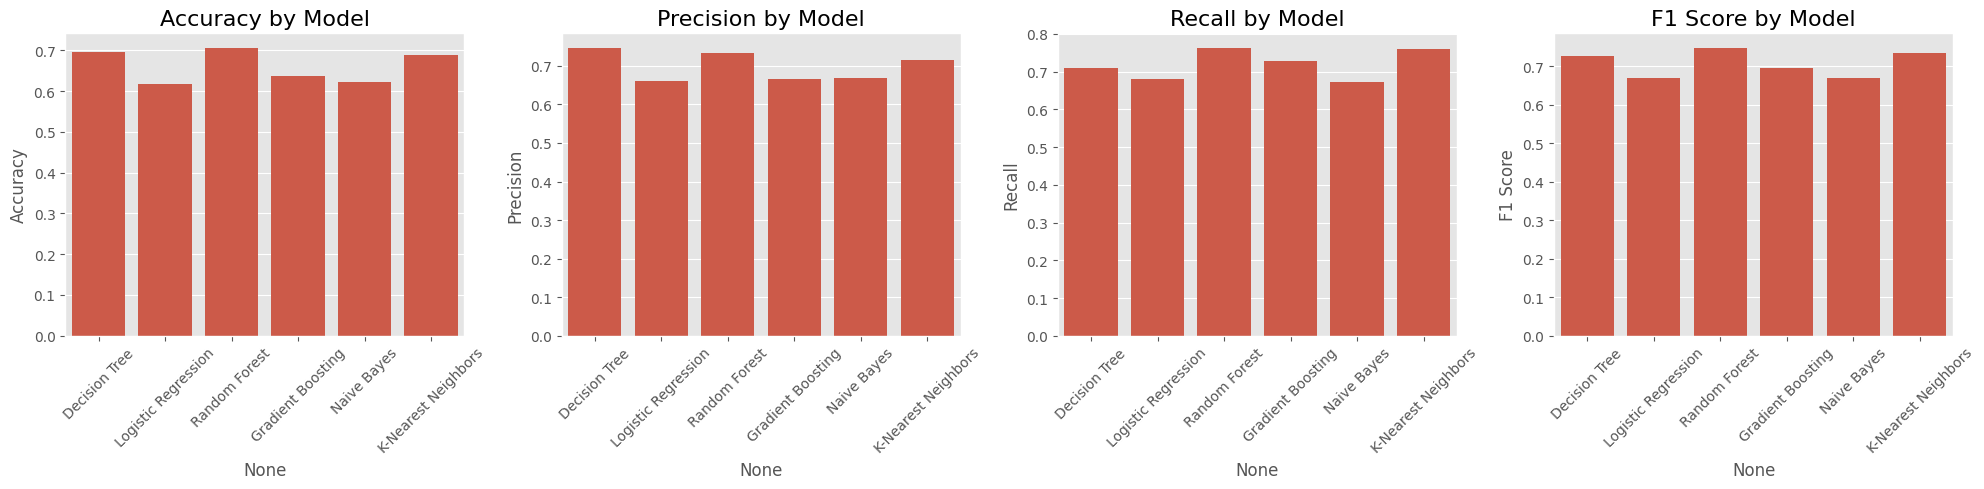

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 이름과 성능 지표를 저장할 딕셔너리
model_metrics = {}

# 모델 학습 및 평가 루프
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# 성능 지표 DataFrame 생성
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

# 모델 성능 막대 그래프 시각화
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model', fontsize=16)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 3.2 Decision Tree

##### 전체 변수

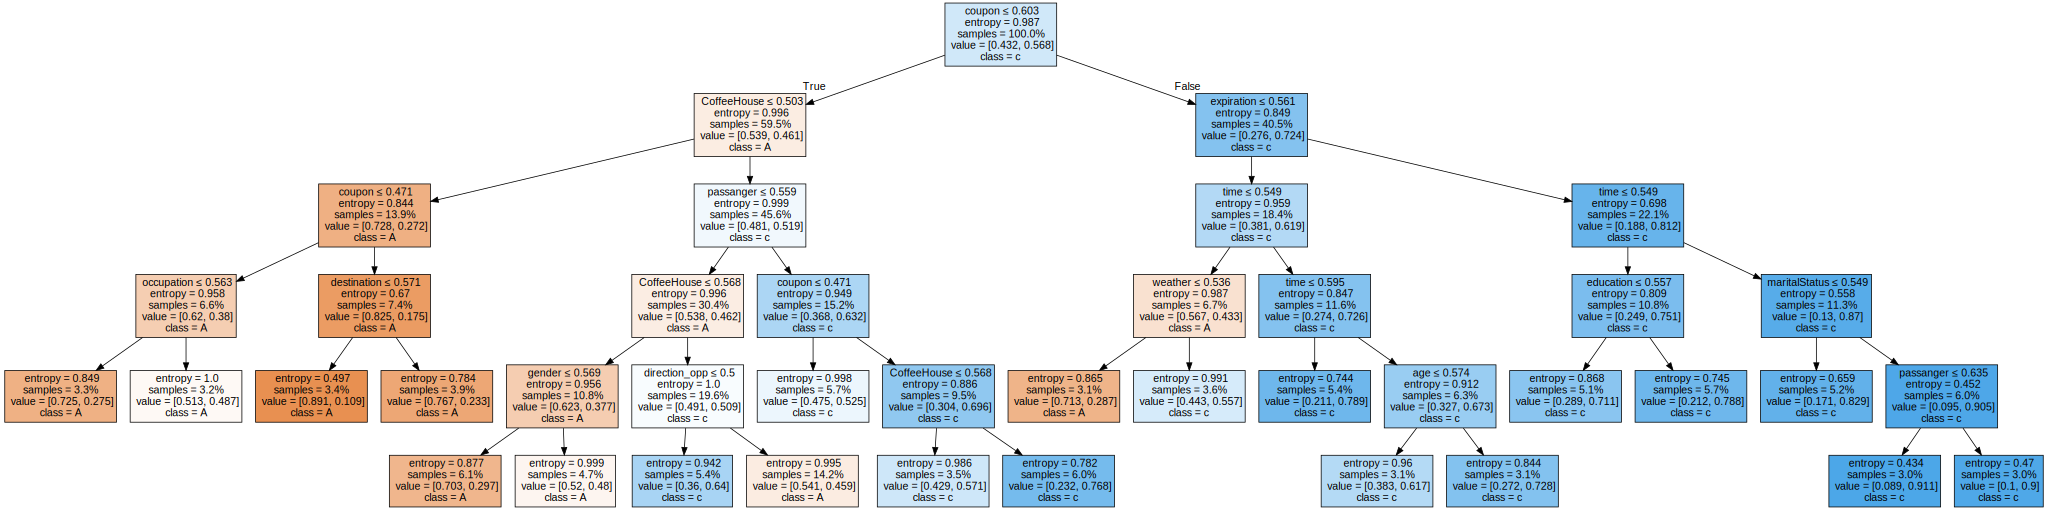

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision tree fitting
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=5, random_state=12)
dt.fit(X_train, y_train)

# Visualization
dot_data = export_graphviz(dt, out_file=None,
                      feature_names=X.columns,
                      class_names='Acceptance of coupon',
                      filled=True, rounded=False,
                      proportion=True,
                      special_characters=True)
visulize_dt = graphviz.Source(dot_data)
visulize_dt

##### 유의미한 변수

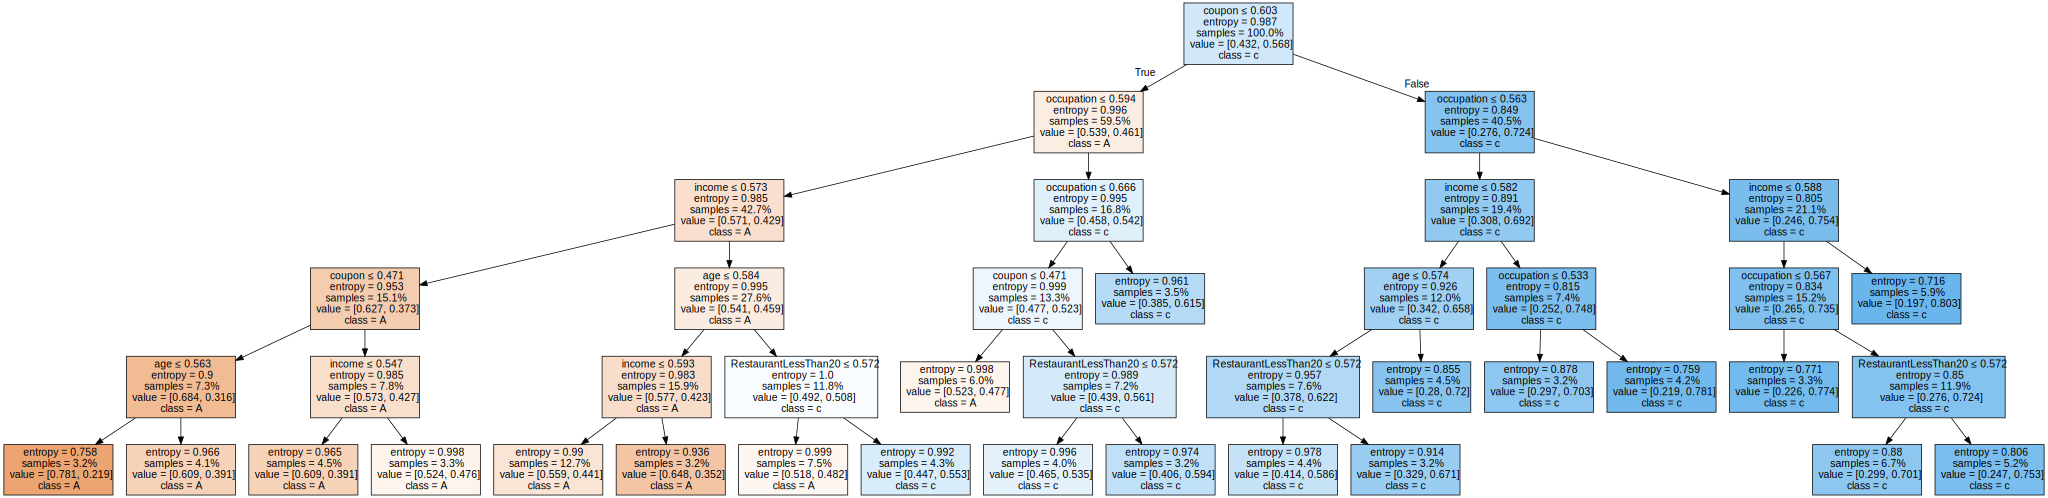

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision tree fitting
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=5, random_state=12)
dt.fit(X_train, y_train)

# Visualization
dot_data = export_graphviz(dt, out_file=None,
                      feature_names=X.columns,
                      class_names='Acceptance of coupon',
                      filled=True, rounded=False,
                      proportion=True,
                      special_characters=True)
visulize_dt = graphviz.Source(dot_data)
visulize_dt

#### 3.3 Random Forest

##### 유의미한 변수

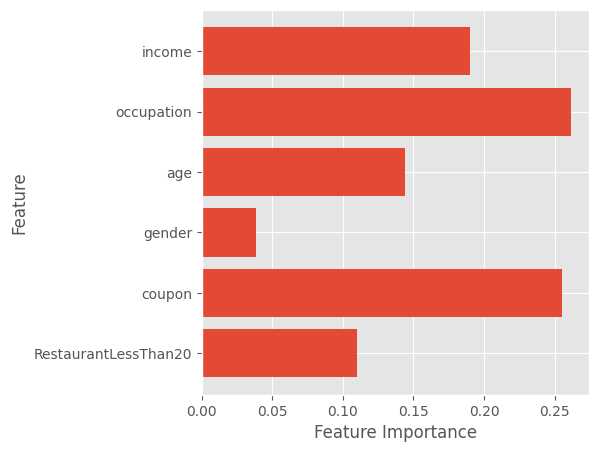

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 모델 훈련
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# 특징 중요도 시각화
feature_importances = rf.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#### 3.4 Gradient Boosting

##### 유의미한 변수

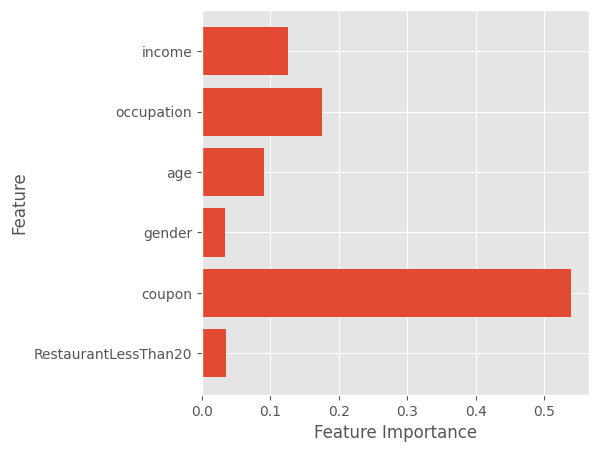

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# 모델 훈련
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# 특징 중요도 시각화
feature_importances = gb.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


Decision Tree AUROC: 0.7612650020672976
Logistic Regression AUROC: 0.6648521174225047
Random Forest AUROC: 0.7769909775202625
Gradient Boosting AUROC: 0.6880490374322464
Naive Bayes AUROC: 0.6637618303230082
K-NN AUROC: 0.7380064879162207


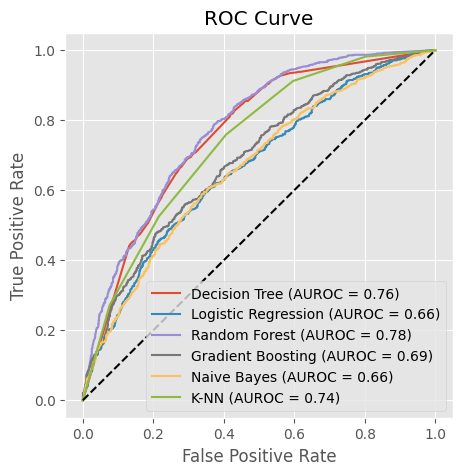

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# 모델 훈련 및 예측
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-NN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # AUROC 계산
    auroc = roc_auc_score(y_test, y_pred_proba)
    print(f'{model_name} AUROC: {auroc}')

    # ROC 곡선 시각화
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUROC = {auroc:.2f})')

# ROC 곡선 시각화
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

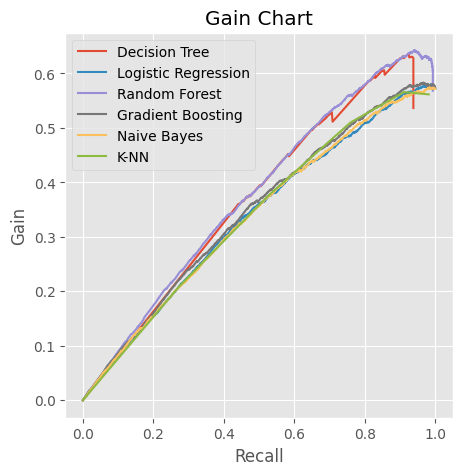

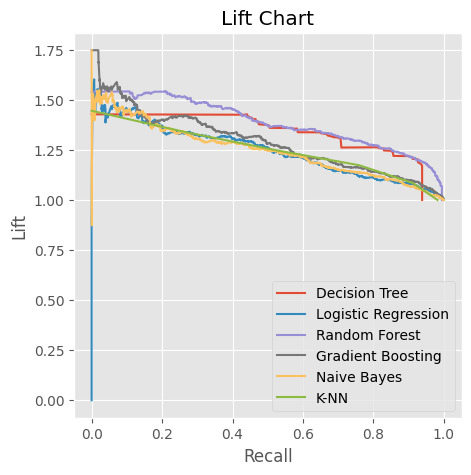

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 모델 훈련 및 예측
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-NN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Gain Chart 계산
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    gain = precision[:-1] * recall[1:]
    plt.plot(recall[1:], gain, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Gain')
plt.title('Gain Chart')
plt.legend()
plt.show()

# Lift Chart 계산
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 각 모델별로 리프트를 계산
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    lift = precision[:-1] / (sum(y_test) / len(y_test))
    plt.plot(recall[1:], lift, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend()
plt.show()

### Encoding 후 Classification model 성능 비교

#### 4.1 Encoding 및 새로운 변수 생성

##### 새로운 변수 생성
 - toCoupon : toCoupon_GEQ15min, toCoupon_GEQ25min 컬럼은 쿠폰 사용을 위해 레스토랑/바까지 운전 허용 거리를 의미하므로, toCoupon이라는 새로운 변수를 생성하여 합침
  - 0 : 15분 이하 허용
  - 1 : 15분 초과 25분 이하
  - 2 : 25분 초과

In [ ]:
# toCoupon
df['to_Coupon'] = 2
df.loc[df['toCoupon_GEQ15min'] == 0, 'to_Coupon'] = 0
df.loc[(df['toCoupon_GEQ15min'] == 1) & (df['toCoupon_GEQ25min'] == 0), 'to_Coupon'] = 1

print(df['to_Coupon'].describe())

count    12007.000000
mean         0.675772
std          0.672066
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: to_Coupon, dtype: float64


In [ ]:
univariate_analysis(df,'to_Coupon')

NameError: name 'univariate_analysis' is not defined

In [ ]:
df.drop(['toCoupon_GEQ15min','toCoupon_GEQ25min'], axis=1, inplace=True)

In [ ]:
df.groupby("occupation")["Y"].mean().sort_values()

occupation
Retired                                      0.454352
Legal                                        0.470320
Community & Social Services                  0.493088
Education&Training&Library                   0.511163
Arts Design Entertainment Sports & Media     0.532028
Installation Maintenance & Repair            0.533835
Farming Fishing & Forestry                   0.534884
Unemployed                                   0.545152
Personal Care & Service                      0.555556
Computer & Mathematical                      0.562963
Sales & Related                              0.563261
Food Preparation & Serving Related           0.565217
Business & Financial                         0.568932
Life Physical Social Science                 0.579882
Management                                   0.590728
Building & Grounds Cleaning & Maintenance    0.590909
Transportation & Material Moving             0.596330
Office & Administrative Support              0.602273
Student          

##### Ordinal Encoding

In [ ]:
encoded_df = df.copy()

In [ ]:
encoded_df.head()

destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80  10AM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration gender age maritalStatus  ...  \
0        Restaurant(<20)         1d   Male  21        Single  ...   
1           Coffee House         2h   Male  21        Single  ...   
2                    Bar         1d   Male  21        Single  ...   
3  Carry out & Take away         2h   Male  21        Single  ...   
4           Coffee House         1d   Male  21        Single  ...   

                   occupation           income    Bar CoffeeHouse CarryAway  \
0  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
1  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
2  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
3  Architecture & Engineering  $62500 - $74999  never       less1       4~8   
4  Architecture & Engineering  $62500 - $74999  never       less1       4~8   

  RestaurantLessThan20 Restaurant20To50 direction_same  Y  to_Coupon  
0                  4~8            less1              0  1          0  
1                  4~8            less1              0  0          0  
2                  4~8            less1              0  1          0  
3                  4~8            less1              0  0          1  
4                  4~8            less1              0  0          0  

[5 rows x 22 columns]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

order = [['Work','Home','No Urgent Place'],
         ['Kid(s)','Alone','Partner','Friend(s)'],
         ['Rainy','Snowy','Sunny'],
         [30,55,80],
         ['7AM','10AM','2PM','6PM','10PM'],
         ['Bar','Restaurant(20-50)','Coffee House','Restaurant(<20)','Carry out & Take away'],
         ['2h','1d'],
         ['Female','Male'],
         ['below21','21','26','31','36','41','46','50plus'],
         ['Widowed','Divorced','Married partner','Unmarried partner','Single'],
         ['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)'],
         ['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'],
         ['less1', 'never', '1~3', 'gt8', '4~8'],
         ['less1', 'never', '1~3', 'gt8', '4~8'],
         ['less1', 'never', '1~3', 'gt8', '4~8'],
         ['less1', 'never', '1~3', 'gt8', '4~8'],
         ['less1', 'never', '1~3', 'gt8', '4~8'],
         ['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry']
         ]
Ordinal_enc = OrdinalEncoder(categories=order)
columns_to_encode = ['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon', 'expiration', 'gender', 'age', 'maritalStatus', 'education', 'income', 'Restaurant20To50', 'RestaurantLessThan20', 'CarryAway', 'Bar', 'CoffeeHouse', 'occupation']
data_to_encode = encoded_df[columns_to_encode]
df_Ordinal_encoding = Ordinal_enc.fit_transform(data_to_encode)
encoded_df[columns_to_encode] = df_Ordinal_encoding
encoded_df.head()

destination  passanger  weather  temperature  time  coupon  expiration  \
0          2.0        1.0      2.0          1.0   2.0     3.0         1.0   
1          2.0        3.0      2.0          2.0   1.0     2.0         0.0   
2          2.0        3.0      2.0          2.0   1.0     0.0         1.0   
3          2.0        3.0      2.0          2.0   1.0     4.0         0.0   
4          2.0        3.0      2.0          2.0   2.0     2.0         1.0   

   gender  age  maritalStatus  ...  occupation  income  Bar  CoffeeHouse  \
0     1.0  1.0            4.0  ...         0.0     5.0  1.0          0.0   
1     1.0  1.0            4.0  ...         0.0     5.0  1.0          0.0   
2     1.0  1.0            4.0  ...         0.0     5.0  1.0          0.0   
3     1.0  1.0            4.0  ...         0.0     5.0  1.0          0.0   
4     1.0  1.0            4.0  ...         0.0     5.0  1.0          0.0   

   CarryAway  RestaurantLessThan20  Restaurant20To50  direction_same  Y  \
0        4.0                   4.0               0.0               0  1   
1        4.0                   4.0               0.0               0  0   
2        4.0                   4.0               0.0               0  1   
3        4.0                   4.0               0.0               0  0   
4        4.0                   4.0               0.0               0  0   

   to_Coupon  
0          0  
1          0  
2          0  
3          1  
4          0  

[5 rows x 22 columns]

#### 4.2 Classification model

##### 모델 수행 및 성능 비교

In [ ]:
# Gradient Boosting 튜닝
## learning rate & 트리 개수
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 500, 1000]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'learning_rate': 0.2, 'n_estimators': 1000}


In [ ]:
## max_depth, 최소 샘플 수
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


Best parameters found:  {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [ ]:
## 샘플링비율, max_features
param_grid = {
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2', 0.3, 0.5]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best parameters found:  {'max_features': 0.5, 'subsample': 0.6}


In [ ]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler


# 타겟 변수와 특징 분리
X = encoded_df.drop('Y', axis=1)
y = encoded_df['Y']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 스케일링
st_scale = StandardScaler()

X_train = st_scale.fit_transform(X_train)
X_test = st_scale.transform(X_test)

# 모델 초기화
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=5, random_state=12),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000, max_depth=8, min_samples_leaf=5, min_samples_split=5, max_features=0.5, subsample=0.6),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'{name} Model:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Precision: {precision_score(y_test, y_pred)}')
    print(f'Recall: {recall_score(y_test, y_pred)}')
    print(f'F1 Score: {f1_score(y_test, y_pred)}')
    print('---'*10)

Decision Tree Model:
Accuracy: 0.6806827643630308
Precision: 0.7287113790504898
Recall: 0.7037845705967977
F1 Score: 0.7160310995927435
------------------------------
Logistic Regression Model:
Accuracy: 0.6619483763530392
Precision: 0.6870838881491345
Recall: 0.7510917030567685
F1 Score: 0.7176634214186369
------------------------------
Random Forest Model:
Accuracy: 0.7514571190674438
Precision: 0.7741707833450953
Recall: 0.7983988355167394
F1 Score: 0.7860981726979577
------------------------------
Gradient Boosting Model:
Accuracy: 0.7581182348043297
Precision: 0.7842293906810036
Recall: 0.7962154294032023
F1 Score: 0.7901769591910438
------------------------------
Naive Bayes Model:
Accuracy: 0.6557035803497085
Precision: 0.684922244759973
Recall: 0.7372634643377002
F1 Score: 0.7101296880476691
------------------------------
K-Nearest Neighbors Model:
Accuracy: 0.6644462947543713
Precision: 0.6974965229485396
Recall: 0.7299854439592431
F1 Score: 0.713371266002845
-----------------

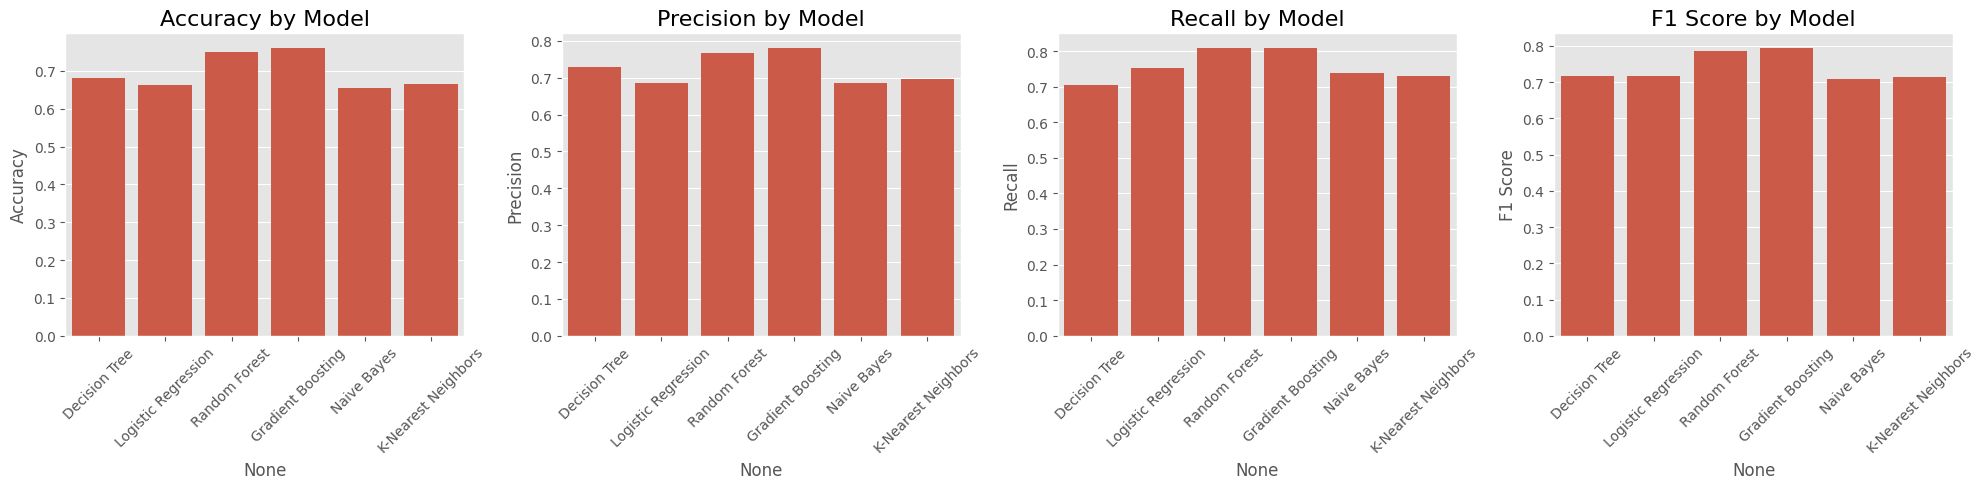

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 이름과 성능 지표를 저장할 딕셔너리
model_metrics = {}

# 모델 학습 및 평가 루프
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    model_metrics[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# 성능 지표 DataFrame 생성
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')

# 모델 성능 막대 그래프 시각화
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for i, metric in enumerate(metrics):
    sns.barplot(x=metrics_df.index, y=metric, data=metrics_df, ax=axes[i])
    axes[i].set_title(f'{metric} by Model', fontsize=16)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Decision Tree 시각화

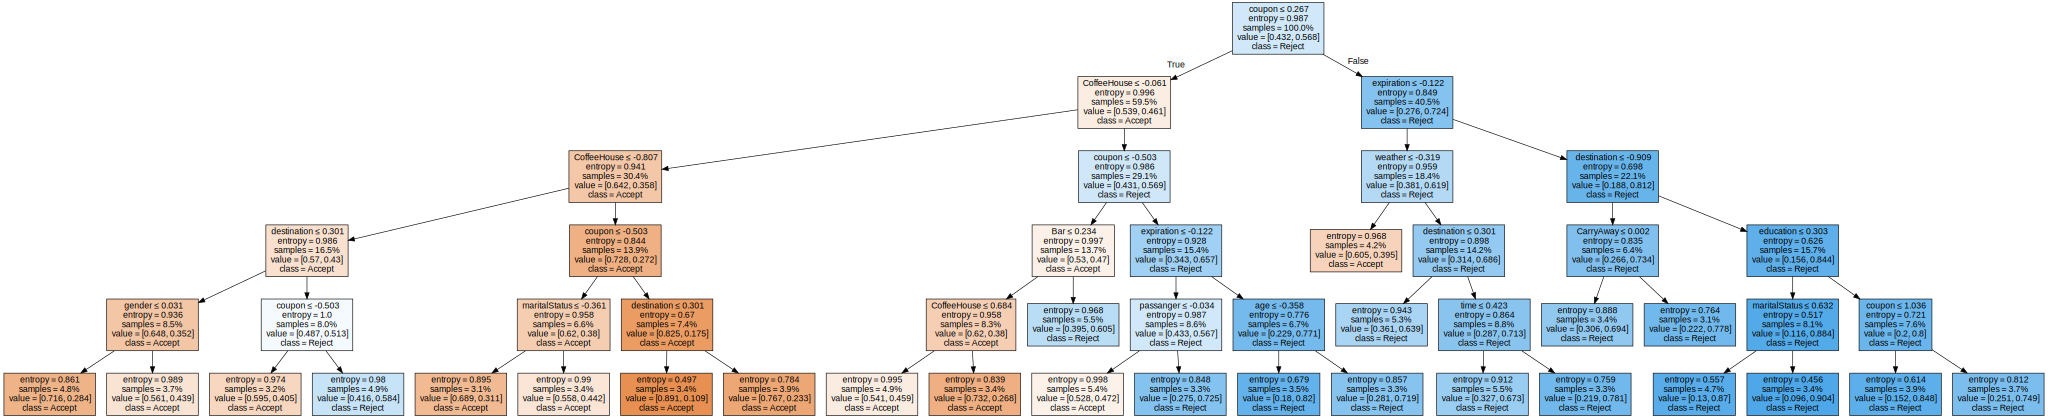

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Decision tree fitting
dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03, max_depth=5, random_state=12)
dt.fit(X_train, y_train)

# Visualization
dot_data = export_graphviz(dt, out_file=None,
                      feature_names=X.columns,
                      class_names=['Accept', 'Reject'],
                      filled=True, rounded=False,
                      proportion=True,
                      special_characters=True)
visulize_dt = graphviz.Source(dot_data)
visulize_dt

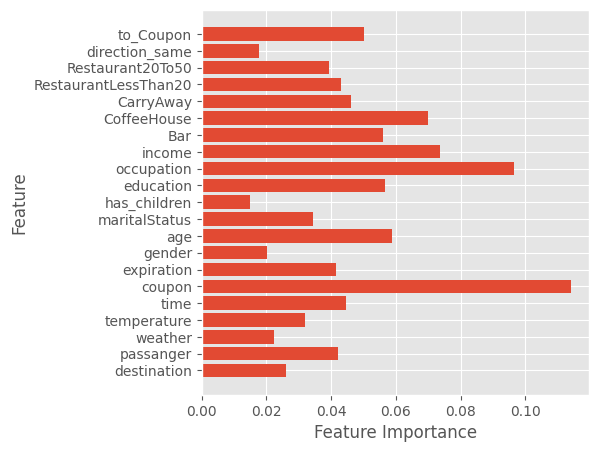

In [ ]:
# Feature Importance

from sklearn.tree import DecisionTreeClassifier

# 의사결정트리 모델 학습
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# 특징 중요도 시각화
feature_importances = clf.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

##### Random Forest Feature Importance

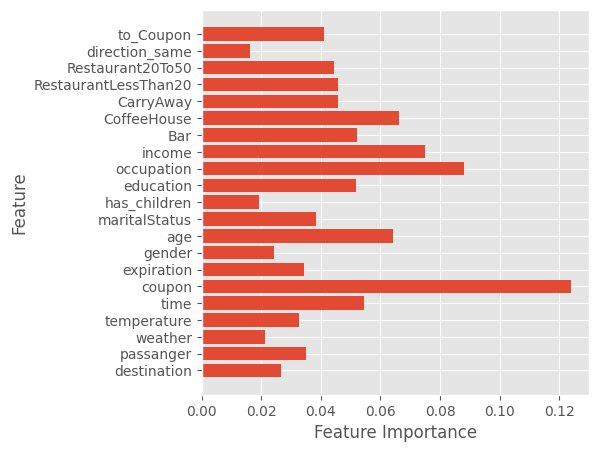

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 모델 훈련
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# 특징 중요도 시각화
feature_importances = rf.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

##### Gradient Boosting Feature Importance

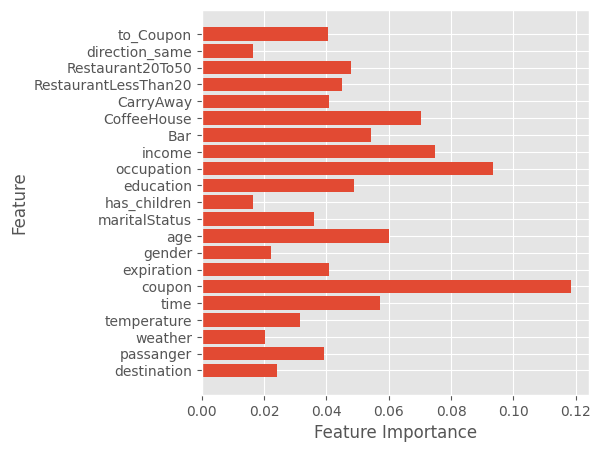

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# 모델 훈련
gb = GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000, max_depth=8, min_samples_leaf=5, min_samples_split=5, max_features=0.5, subsample=0.6)
gb.fit(X_train, y_train)

# 특징 중요도 시각화
feature_importances = gb.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, tick_label=X.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

##### ROC curve

Decision Tree AUROC: 0.675823662345165
Logistic Regression AUROC: 0.7012376174536558
Random Forest AUROC: 0.8169018571695581
Gradient Boosting AUROC: 0.816340076121863
Naive Bayes AUROC: 0.6799989663511915
K-NN AUROC: 0.7127989085801346


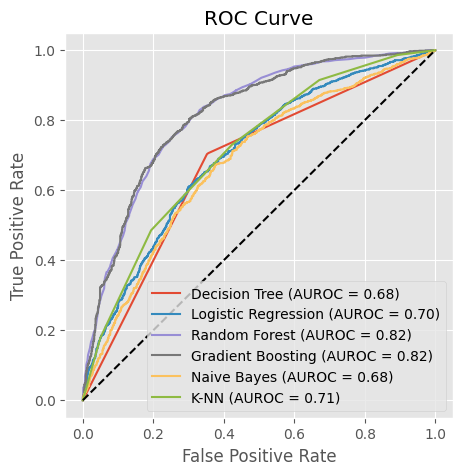

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

# 모델 훈련 및 예측
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000, max_depth=8, min_samples_leaf=5, min_samples_split=5, max_features=0.5, subsample=0.6),
    'Naive Bayes': GaussianNB(),
    'K-NN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # AUROC 계산
    auroc = roc_auc_score(y_test, y_pred_proba)
    print(f'{model_name} AUROC: {auroc}')

    # ROC 곡선 시각화
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUROC = {auroc:.2f})')

# ROC 곡선 시각화
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

##### Gain Chart, Lift Chart

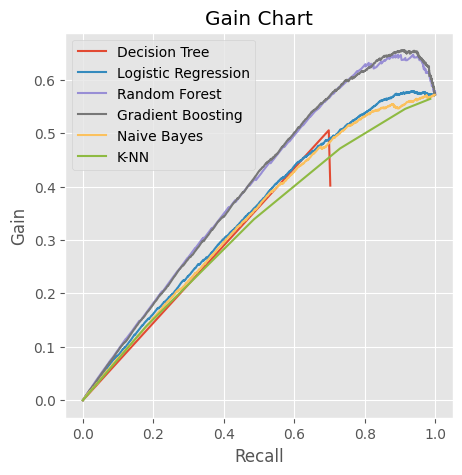

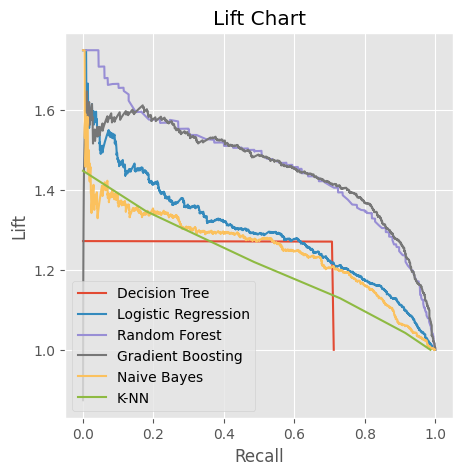

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# 모델 훈련 및 예측
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000, max_depth=8, min_samples_leaf=5, min_samples_split=5, max_features=0.5, subsample=0.6),
    'Naive Bayes': GaussianNB(),
    'K-NN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Gain Chart 계산
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    gain = precision[:-1] * recall[1:]
    plt.plot(recall[1:], gain, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Gain')
plt.title('Gain Chart')
plt.legend()
plt.show()

# Lift Chart 계산
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # 각 모델별로 리프트를 계산
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    lift = precision[:-1] / (sum(y_test) / len(y_test))
    plt.plot(recall[1:], lift, label=model_name)

plt.xlabel('Recall')
plt.ylabel('Lift')
plt.title('Lift Chart')
plt.legend()
plt.show()

#### 4.3 Color DT

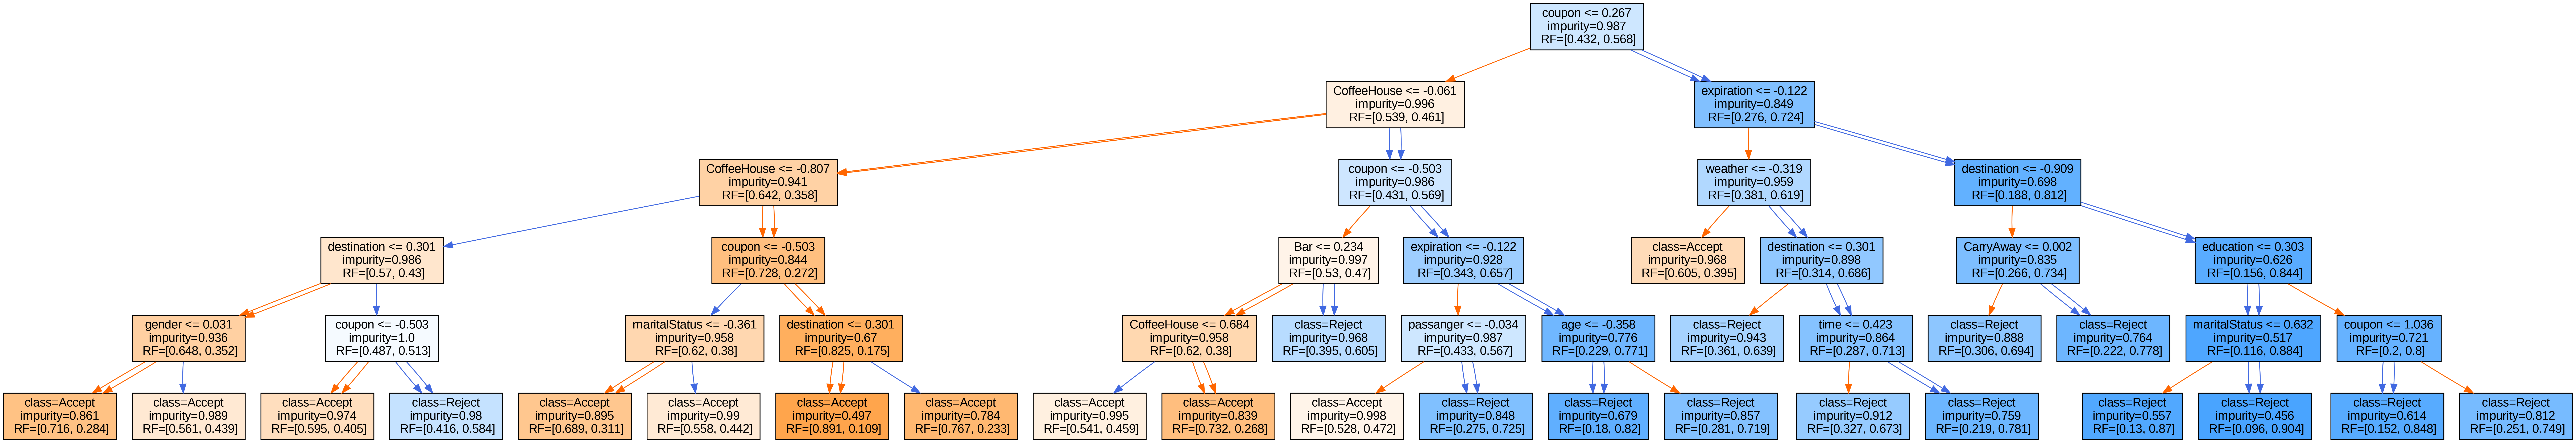

Color Decision Tree saved as 'color_dt.png'


In [ ]:
from colorDT_sklearn import colorDT # colorDT_sklearn.py

color_dt = colorDT(model=dt, feature_names=X.columns, class_names=['Accept', 'Reject'])
color_dt.display_color_tree()
color_dt.save_color_tree(output_file='color_dt')

##### Color DT: Underlying rule

In [ ]:
color_dt.display_rules(X_train, y_train)


Rules:
Rule (Type 1)
Original Rule:
IF coupon <= 0.26654040440917015 and CoffeeHouse <= -0.061334237456321716 and CoffeeHouse <= -0.8065783530473709 and destination <= 0.30096352100372314 and gender <= 0.030519157648086548 THEN class = Accept (RF: 0.716)
Compact Rule:
IF coupon <= 0.26654040440917015 and CoffeeHouse <= -0.061334237456321716 and destination <= 0.30096352100372314 and gender <= 0.030519157648086548 THEN class = Accept (RF: 0.745)

Rule (Type 2)
Original Rule:
IF coupon <= 0.26654040440917015 and CoffeeHouse <= -0.061334237456321716 and CoffeeHouse <= -0.8065783530473709 and destination <= 0.30096352100372314 and gender > 0.030519157648086548 THEN class = Accept (RF: 0.561)
Compact Rule (Method 1 - Full path IR Removal):
IF coupon <= 0.26654040440917015 and CoffeeHouse <= -0.061334237456321716 and destination <= 0.30096352100372314 THEN class = Accept (RF: 0.692)
Compact Rule (Method 2 - Max RF node-based IR Removal):
IF coupon <= 0.26654040440917015 and CoffeeHouse <= -

##### Type별 RF Table

In [ ]:
epsilon=0.07
color_dt.type_rf_table(epsilon)

Rule Count  RF Diff < Epsilon  Ratio
Rule Type                                        
Type 1-n              2                  2   1.00
Type 1-y              9                  8   0.89
Type 2-m1            14                  5   0.36
Type 2-m2-n          11                 11   1.00
Type 2-m2-y           3                  1   0.33

##### Type별 RF table의 평균 계산

In [ ]:
# Define the parameters
epsilon = 0.07
num_iterations = 30 # 최소 10번 이상

summary_tables = []
for _ in range(num_iterations):
    X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2)
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=0.03)
    dt.fit(X_train, y_train)

    color_dt = colorDT(model=dt, feature_names=X.columns, class_names=['Accept', 'Reject'])
    color_dt.classify_rules(X_train, y_train)

    type_rf_table = color_dt.type_rf_table(epsilon)
    summary_tables.append(type_rf_table)

combined_summary_table = pd.concat(summary_tables)
averaged_summary_table = combined_summary_table.groupby(combined_summary_table.index).mean()
averaged_summary_table.round(3)

Rule Count  RF Diff < Epsilon  Ratio
Rule Type                                        
Type 1-n          2.000              2.000  1.000
Type 1-y          8.633              7.200  0.837
Type 2-m1        14.367              3.833  0.265
Type 2-m2-n      11.833             11.833  1.000
Type 2-m2-y       2.533              1.833  0.734